# Telecom Churn Case Study

#### <font color='green'>Group members for the Case Study</font>
- Md Junaid Alam
- Nupur Adlakha

### <font color=brown>Problem Statement</font>
 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, <b>customer retention</b> has now become even more important than customer acquisition.

 

For many incumbent operators, <i>retaining high profitable</i> customers is the number one business goal.

 

To reduce customer churn, telecom companies need to <b>predict which customers are at high risk of churn</b>.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

### <font color=brown>Understanding and Defining Churn</font>
There are two main models of payment in the telecom industry - <b>postpaid</b> (customers pay a monthly/annual bill after using the services) and <b>prepaid</b> (customers pay/recharge with a certain amount in advance and then use the services).

 

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

 

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

 

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

 

This project is based on the Indian and Southeast Asian market.

 

### <font color=brown>Definitions of Churn</font>
There are various ways to define churn, such as:

- **Revenue-based churn**: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

 

- **Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

 

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

 

In this project, you will use the usage-based definition to define churn.

 

### <font color=brown>High-value Churn</font>
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

 

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

### <font color=brown>Understanding the Business Objective and the Data</font>
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 

### <font color=brown>Understanding Customer Behaviour During Churn</font>
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

- **The ‘good’ phase**: In this phase, the customer is happy with the service and behaves as usual.

- **The ‘action’ phase**: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- **The ‘churn’ phase**: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 
<i>
In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.</i>

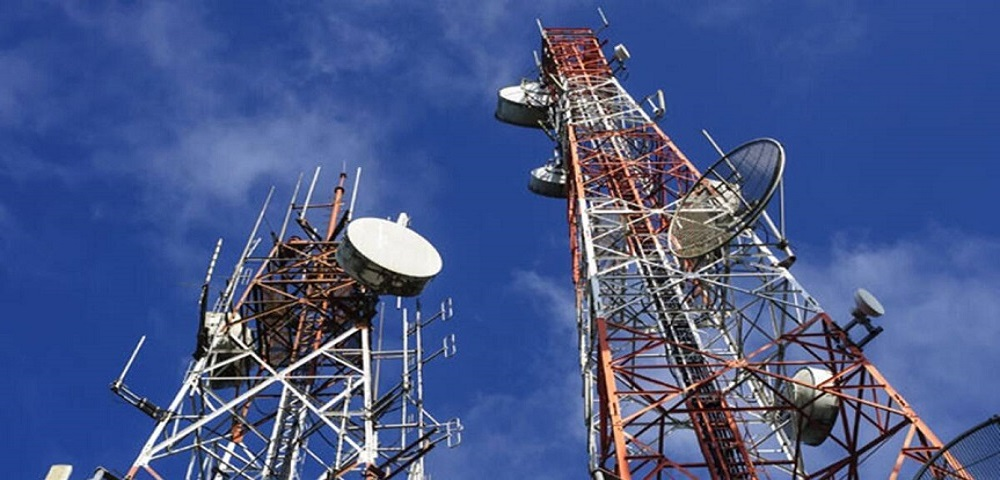

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Display 500 Rows and all Columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [2]:
# Import Scikit learn libraries and other libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as statsmodel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

# import SMOTE for handling class imbalance (This requires to install imblearn)
from imblearn.over_sampling import SMOTE

In [3]:
# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the csv file and store the dataset in a variable 'telecom_df'
telecom_df = pd.read_csv("telecom_churn_data.csv")

### Understanding the Data

#### Let us have a look at the snapshot of the data dictionary

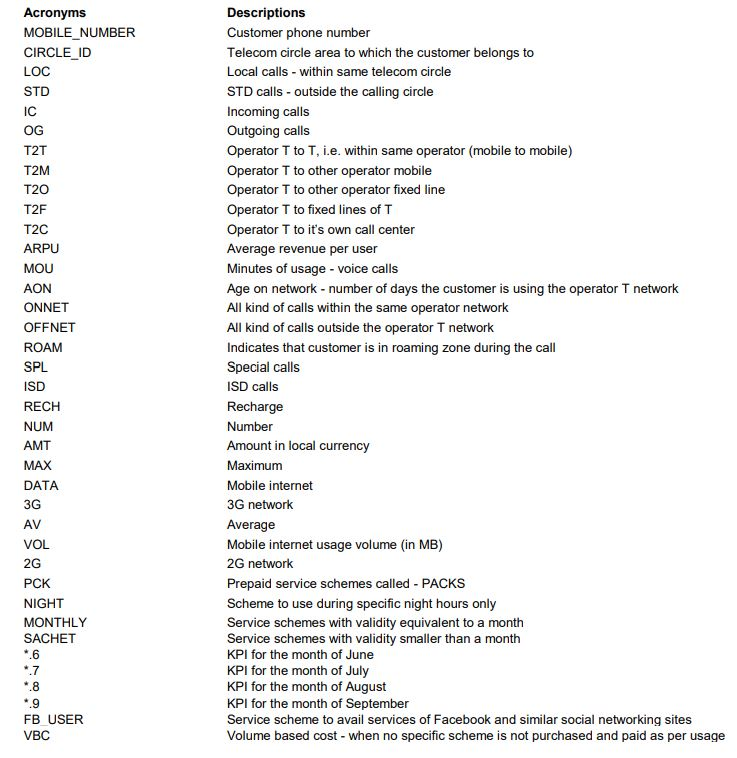

In [5]:
# Explore the first 5 row of the dataset
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# Find out the number of rows and columns of the dataset
telecom_df.shape

(99999, 226)

<font style='font-size:14px'>So there are 99999 rows and 226 columns in the dataset</font>

In [7]:
# Check the information of the dataset
telecom_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

<font style='font-size:14px'>We observe that most of the columns are numerical and some are non numeric and of type object. We also observe that the date columns are represented as object.</font>

In [8]:
# Get all the columns name that are of type object
datetime_cols= telecom_df.select_dtypes(include=['object']).columns
datetime_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

<font style="color:green;font-size:14px">We observe that all the columns with object type are date related columns. In future we will drop it if not required in analysis.</font>

In [9]:
# Check the count mean max and other stastical attributes of the data
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [10]:
# Let is check the unique values in each columns
telecom_df.nunique().sort_values()

std_ic_t2o_mou_6                1
std_og_t2c_mou_8                1
std_og_t2c_mou_9                1
std_ic_t2o_mou_9                1
std_ic_t2o_mou_8                1
std_og_t2c_mou_7                1
std_ic_t2o_mou_7                1
last_date_of_month_9            1
std_og_t2c_mou_6                1
last_date_of_month_7            1
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_8            1
last_date_of_month_6            1
night_pck_user_7                2
night_pck_user_8                2
night_pck_user_9                2
night_pck_user_6                2
fb_user_9                       2
fb_user_8                       2
fb_user_7                       2
fb_user_6                       2
monthly_2g_9                    5
monthly_2g_6                    5
monthly_2g_7                    6
monthly_2g_8                    6
monthly_3g_9                   11
monthly_3g_6  

Hence we observe that there are certain columns which has a unique value of 1 and hence no variance in its values. So this column will not be significant in analysis and hence we can go ahead and drop those columns.

In [11]:
# Get the list of columns with unique value as 1 indicating no variance
unique_cols = [col for col in telecom_df.columns if telecom_df[col].nunique() == 1]
print("Columns with unique value of 1 are {0}".format(unique_cols))

Columns with unique value of 1 are ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [12]:
# Let us drop these unique value columns with unique value as 1
telecom_df.drop(unique_cols, axis=1, inplace = True)

In [13]:
# Let us check and validate the updated shape of the dataset
telecom_df.shape

(99999, 210)

### Handling the missing values

#### Check for missing values

In [14]:
# Let us check the percentage of missing values column-wise
round(((telecom_df.isnull().sum()/ len(telecom_df)) * 100), 2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

As we observe that there are certain columns having more than 70% missing values. Generally we would tend to drop these columns, but doing that may result in loss of some useful information as we have to derive the high value customers those who are in top 20% of those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
<b>Hence we will not drop these columns at this point and analyze further.</b>

In [15]:
# Handling missing values with respect to `data recharge` attributes
telecom_df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,6/21/2014,1.0,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,6/4/2014,1.0,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


* In the column `date_of_last_rech_data_* ` which indicates the date of the last recharge made in any given month for data. It can be deduced that if the `total_rech_data_* ` and the `max_rech_data_* ` has missing values, the missing values in all the columns mentioned can be considered as a significant missing value.<br> 
* We will impute these missing values with 0<br>
* This missing values indicates that the customer has not done any recharge for data for the given months

##### Let us handle the missing values for the columns `total_rech_data_*`, `max_rech_data_*` for the month 6,7,8 and 9

In [16]:
# Defining a function for imputing the recharge related missing value with zero. This is iterative approach and time consuming
def imputewith_zero(total_rech_data, max_rech_data, date_of_last_rech_data):
    for i in range(len(telecom_df)):
        if pd.isnull((telecom_df[total_rech_data][i]) and (telecom_df[max_rech_data][i])):
            if pd.isnull(telecom_df[date_of_last_rech_data][i]):
                telecom_df[total_rech_data][i]=0
                telecom_df[max_rech_data][i]=0

In [17]:
# Define a function to check if both corresponding columns have null value and impute. This would process faster
def impute_if_equal_null(total_rech_data, max_rech_data, av_rech_amt_data):
    if(telecom_df[total_rech_data].isnull().sum()==0):
         print('No imputation required')
    elif (telecom_df[total_rech_data].isnull().equals(telecom_df[max_rech_data].isnull())):
        telecom_df[total_rech_data].fillna(0, inplace=True)
        telecom_df[max_rech_data].fillna(0, inplace=True)
        telecom_df[av_rech_amt_data ].fillna(0, inplace=True)
        print('Imputed successfully.')
    else:
        print('The Corresponding values for NULL values for this month are not equal hence using iterative process')
        print("Please wait iterative process would take some time to impute.......")
        imputewith_zero(total_rech_data, max_rech_data, date_of_last_rech_data)
        print('Imputed successfully.')

In [18]:
# Let us check the 'total_rech_data_6','max_rech_data_6','date_of_last_rech_data_6' columns
telecom_df[['total_rech_data_6','max_rech_data_6','date_of_last_rech_data_6']]

,total_rech_data_6,max_rech_data_6,date_of_last_rech_data_6
0,1.0,252.0,6/21/2014
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,1.0,56.0,6/4/2014
...,...,...,...
99994,NaN,NaN,NaN
99995,NaN,NaN,NaN
99996,2.0,25.0,6/13/2014
99997,3.0,202.0,6/17/2014


In [19]:
# Imputing the missing values for 'total_rech_data', 'max_rech_data' for month 6
impute_if_equal_null('total_rech_data_6', 'max_rech_data_6', 'av_rech_amt_data_6')

Imputed successfully.


In [20]:
# Imputing the missing values for 'total_rech_data', 'max_rech_data' for month 7
impute_if_equal_null('total_rech_data_7', 'max_rech_data_7', 'av_rech_amt_data_7')

Imputed successfully.


In [21]:
# Imputing the missing values for 'total_rech_data', 'max_rech_data' for month 6
impute_if_equal_null('total_rech_data_8', 'max_rech_data_8', 'av_rech_amt_data_8')

Imputed successfully.


In [22]:
# Imputing the missing values for 'total_rech_data', 'max_rech_data' for month 6
impute_if_equal_null('total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9')

Imputed successfully.


##### Let us now handle the missing values for the columns `count_rech_2g_*`,`count_rech_3g_*` for month 6,7,8 and 9

In [23]:
# Checking the related columns values
telecom_df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


We observe from the above table that the values of 'total_rech_data_* ' for the months 6 and similarly for months 7,8 and 9 are actually the sum of the column 'count_rech_2g_* ' and the values of the coulmn 'count_rech_3g_* '.

So there is a multicollinearity issue observed. To reduce multicollinearity we can drop the columns 'count_rech_2g_* ' and 'count_rech_3g_* 'for each of the months 6 to 9.

In [24]:
# We can drop the following columns for months 6 till 9
count_rech_cols= ['count_rech_2g_6','count_rech_3g_6', 'count_rech_2g_7','count_rech_3g_7', \
                  'count_rech_2g_8','count_rech_3g_8', 'count_rech_2g_9','count_rech_3g_9']

In [25]:
# Drop the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
telecom_df.drop(count_rech_cols,axis=1, inplace=True)

In [26]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(99999, 202)

##### Let us now handle the columns  `arpu_3g_*`,`arpu_2g_*` for month 6,7,8 and 9

In [27]:
# Checking the related columns values
telecom_df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,0.00,0.00,56.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


#### Check Correlations for each month

In [28]:
# Check correlation for month 6
telecom_df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr()

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
arpu_3g_6,1.000000,0.932232,0.809695
arpu_2g_6,0.932232,1.000000,0.834065
av_rech_amt_data_6,0.809695,0.834065,1.000000


In [29]:
# Check correlation for month 7
telecom_df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr()

,arpu_3g_7,arpu_2g_7,av_rech_amt_data_7
arpu_3g_7,1.000000,0.930366,0.796131
arpu_2g_7,0.930366,1.000000,0.815933
av_rech_amt_data_7,0.796131,0.815933,1.000000


In [30]:
# Check correlation for month 8
telecom_df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr()

,arpu_3g_8,arpu_2g_8,av_rech_amt_data_8
arpu_3g_8,1.000000,0.924925,0.787165
arpu_2g_8,0.924925,1.000000,0.805482
av_rech_amt_data_8,0.787165,0.805482,1.000000


In [31]:
# Check correlation for month 9
telecom_df[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr()

,arpu_3g_9,arpu_2g_9,av_rech_amt_data_9
arpu_3g_9,1.000000,0.852253,0.722932
arpu_2g_9,0.852253,1.000000,0.817815
av_rech_amt_data_9,0.722932,0.817815,1.000000


We observe from the table above that there is a high correlation between attributes `arpu_2g_*` and `arpu_3g_*` for each months 6 to 9 respectively to the attribute `av_rech_amt_data_*`<br><b> So we can safely drop the attributes `arpu_2g_*` and `arpu_3g_* `</b>.

In [32]:
# We can drop the following columns
arpu_cols= ['arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7', \
                 'arpu_3g_8','arpu_2g_8', 'arpu_3g_9','arpu_2g_9']

In [33]:
# Drop the columns 'arpu_2g_*' & 'arpu_3g_*' for the months 6,7,8 and 9 
telecom_df.drop(arpu_cols,axis=1, inplace=True)

In [34]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(99999, 194)

##### Let us now handle the other attributes with higher missing value percentage

In the dataset we observe that the columns `fb_user_*` and `night_pck_user_*` for each months 6 to 9 has a missing values of more than 50% which implies that it does not add any significant information to explain the data. So let us drop these columns.

In [35]:
# Dropping some of the other features that would not be of any use
other_cols=['fb_user_6','fb_user_7','fb_user_8','fb_user_9',\
            'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']

In [36]:
# Drop these other columns
telecom_df.drop(other_cols, axis=1, inplace=True)

In [37]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(99999, 186)

In [38]:
# Checkng the overall missing values in the dataset
((telecom_df.isnull().sum()/telecom_df.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                  7.75
loc_og_t2f_mou_9             7.75
loc_og_t2t_mou_9             7.75
loc_ic_t2f_mou_9             7.75
std_ic_mou_9                 7.75
std_og_t2f_mou_9             7.75
loc_og_t2m_mou_9             7.75
loc_ic_mou_9                 7.75
std_og_t2m_mou_9             7.75
std_ic_t2f_mou_9             7.75
std_ic_t2t_mou_9             7.75
loc_og_t2c_mou_9             7.75
std_ic_t2m_mou_9             7.75
std_og_t2t_mou_9             7.75
loc_og_mou_9                 7.75
std_og_mou_9                 7.75
spl_ic_mou_9                 7.75
roam_og_mou_9                7.75
spl_og_mou_9                 7.75
loc_ic_t2t_mou_9             7.75
isd_og_mou_9                 7.75
roam_ic_mou_9                7.75
loc_ic_t2m_mou_9             7.75
isd_ic_mou_9                 7.75
onnet_mou_9                  7.75
ic_others_9   

We observe that the attributes related to dates 'date_of_last_rech_data_* ' for months 6,7,8 and 9 have high missing values. gooing forward if we analyze that they are of no use in analysis, we will drop them.

### Data Preparation

#### Derived feature

Create a new column 'total_data_rech_amt_* ' which saves the total data recharge  amount calculated form the corresponding columns 'total_rech_data_* ' and 'av_rech_amt_data_* ' for the month 6 and 7 which is the <b>Good Phase</b>.

We also create a new column 'overall_rech_amt_6_* ' that would be the sum of total recharge and total data for the corresponding months 6 and 7.

In [39]:
# Create the new column 'total_dat_rech_amt_*' and 'overall_rech_amt_*' for month 6 and 7
telecom_df['total_data_rech_amt_6'] = telecom_df['total_rech_data_6'] * telecom_df['av_rech_amt_data_6']
telecom_df['overall_rech_amt_6'] = telecom_df['total_data_rech_amt_6'] + telecom_df['total_rech_amt_6']

telecom_df['total_data_rech_amt_7'] = telecom_df['total_rech_data_7'] * telecom_df['av_rech_amt_data_7']
telecom_df['overall_rech_amt_7'] = telecom_df['total_data_rech_amt_7'] + telecom_df['total_rech_amt_7']

#### Filtering high value customers from the good phase

According to the problem statement we need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [40]:
# Calculate the average recharge done in 6th and 7th month (June and July)
telecom_df['avg_rech_amt_6_7'] = (telecom_df['overall_rech_amt_6'] + telecom_df['overall_rech_amt_7'])/2

In [41]:
# Calculate 70th percentile value as per the criteria for high value customers
threshold = telecom_df['avg_rech_amt_6_7'].quantile(0.70)
print("The threshold value of 70th percentile value is: ",threshold)

The threshold value of 70th percentile value is:  478.0


In [42]:
# Filter the data to obtain the High Value Customer
telecom_df = telecom_df[telecom_df['avg_rech_amt_6_7'] >= threshold]

In [43]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(30001, 191)

In [44]:
# Check the shape of the updated dataset
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,overall_rech_amt_6,total_data_rech_amt_7,overall_rech_amt_7,avg_rech_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,614.0,252.0,504.0,559.0
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.

In [45]:
# Reset the index 
telecom_df = telecom_df.reset_index(drop=True)
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,overall_rech_amt_6,total_data_rech_amt_7,overall_rech_amt_7,avg_rech_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,614.0,252.0,504.0,559.0
1,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.

### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

After tagging churners, we will need to remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [46]:
telecom_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00
2,34.91,142.18,0.00,0.00
3,252.61,1031.53,0.00,0.00
4,127.48,127.63,13.93,314.74


In [47]:
# define function for tagging churners
def tagchurn(data):
    if((data.total_ic_mou_9 == 0) and (data.total_og_mou_9 == 0)\
       and (data.vol_2g_mb_9 == 0) and (data.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0
    

In [48]:
telecom_df['churn'] = telecom_df.apply(tagchurn, axis=1)

In [49]:
telecom_df['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [50]:
# Check the churn and non churn percentage
churn_stats = (telecom_df['churn'].value_counts()/len(telecom_df))*100

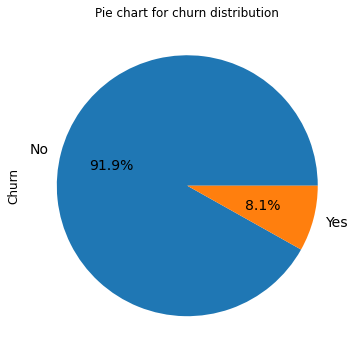

In [51]:
# Plot a Pie chart for the Churn
plt.figure(figsize = (7, 7))
ax = churn_stats.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Pie chart for churn distribution', fontsize = 12)
plt.show()

<b>We observe that about 91% of the customers do not churn, hence we have a situation of class imbalance here.</b>

As the variable 'churn' is the target variable, hence all the columns with suffix _9 relating to this variable can be dropped from the dataset.

In [52]:
# Get all the columns of churn phase that will be dropped with prefix _9
churn_phase_cols = [col for col in telecom_df.columns if '_9' in col]

In [53]:
# display the columns to be dropped
churn_phase_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [54]:
# Drop the selected churn phase columns
telecom_df.drop(churn_phase_cols, axis=1, inplace=True)

In [55]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(30001, 147)

##### Let us now check the collinearity

In [56]:
# Checking the correlation amongst the independent variables between -80 percent to +80%
telecom_df_corr = telecom_df.corr()
telecom_df_corr.loc[:,:] = np.tril(telecom_df_corr, k=-1)
telecom_df_corr = telecom_df_corr.stack()
telecom_df_corr = telecom_df_corr[(telecom_df_corr > 0.80) | (telecom_df_corr < -0.80)].sort_values(ascending=False)

In [57]:
# Display the filtered high correlations
telecom_df_corr

total_rech_amt_8    arpu_8                   0.955351
isd_og_mou_8        isd_og_mou_6             0.950194
                    isd_og_mou_7             0.949809
total_rech_amt_6    arpu_6                   0.946125
total_rech_amt_7    arpu_7                   0.943588
overall_rech_amt_7  total_data_rech_amt_7    0.934656
overall_rech_amt_6  total_data_rech_amt_6    0.934058
isd_og_mou_7        isd_og_mou_6             0.933275
sachet_2g_7         total_rech_data_7        0.904243
sachet_2g_6         total_rech_data_6        0.903875
sachet_2g_8         total_rech_data_8        0.900629
total_ic_mou_6      loc_ic_mou_6             0.895374
total_ic_mou_8      loc_ic_mou_8             0.893832
total_ic_mou_7      loc_ic_mou_7             0.883165
std_og_t2t_mou_8    onnet_mou_8              0.859913
std_og_t2t_mou_7    onnet_mou_7              0.859910
std_og_t2t_mou_6    onnet_mou_6              0.858997
avg_rech_amt_6_7    overall_rech_amt_7       0.856275
std_og_t2m_mou_7    offnet_m

In [58]:
drop_cols = ['total_rech_amt_8','isd_og_mou_8','total_rech_amt_6','total_rech_amt_7','total_data_rech_amt_6',\
             'isd_og_mou_7','sachet_2g_7','sachet_2g_6','sachet_2g_8','total_ic_mou_6','total_ic_mou_8',\
             'total_ic_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_7','std_og_t2t_mou_6','overall_rech_amt_7',\
             'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_mou_8']

In [59]:
# Drop the listed columns
telecom_df.drop(drop_cols, axis=1, inplace=True)

In [60]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(30001, 128)

we can derive new variables from the column called 'aon' which denotes 'Age of Network'. This derived variable can explain the data with respect to churn.

In [61]:
# Create a new column called duration
telecom_df['duration'] = (telecom_df['aon']/30).round(0)

In [62]:
# Drop the column 'aon' Since we derived a new column from it.
telecom_df.drop('aon',axis=1, inplace=True)

In [63]:
# Let us now check for columns having more than or equal to 40% of missing data
df_ge_40 = ((telecom_df.isnull().sum()/ len(telecom_df)) * 100) >= 40
df_ge_40

mobile_number               False
arpu_6                      False
arpu_7                      False
arpu_8                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
offnet_mou_6                False
offnet_mou_7                False
offnet_mou_8                False
roam_ic_mou_6               False
roam_ic_mou_7               False
roam_ic_mou_8               False
roam_og_mou_6               False
roam_og_mou_7               False
roam_og_mou_8               False
loc_og_t2t_mou_6            False
loc_og_t2t_mou_7            False
loc_og_t2t_mou_8            False
loc_og_t2m_mou_6            False
loc_og_t2m_mou_7            False
loc_og_t2m_mou_8            False
loc_og_t2f_mou_6            False
loc_og_t2f_mou_7            False
loc_og_t2f_mou_8            False
loc_og_t2c_mou_6            False
loc_og_t2c_mou_7            False
loc_og_t2c_mou_8            False
loc_og_mou_6                False
loc_og_mou_7  

In [64]:
# get the columns having greater than equal to 40% missing values
cols = list(df_ge_40[df_ge_40.values==True].index)
cols

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

So we get the 3 dates columns having more than 40% missing values, hence we can drop them as dates cannot be imputed generally.

In [65]:
# Drop the above dates columns
telecom_df.drop(cols, axis=1, inplace = True)

In [66]:
# Let us get the columns that do have null values
null_value_cols =telecom_df.columns[telecom_df.isna().any()].tolist()

In [67]:
# Let us look at the columns with null values for month 6
null_value_cols_6 = [col for col in null_value_cols if '_6' in col]
telecom_df[null_value_cols_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          29456 non-null  float64
 1   offnet_mou_6         29456 non-null  float64
 2   roam_ic_mou_6        29456 non-null  float64
 3   roam_og_mou_6        29456 non-null  float64
 4   loc_og_t2t_mou_6     29456 non-null  float64
 5   loc_og_t2m_mou_6     29456 non-null  float64
 6   loc_og_t2f_mou_6     29456 non-null  float64
 7   loc_og_t2c_mou_6     29456 non-null  float64
 8   loc_og_mou_6         29456 non-null  float64
 9   std_og_t2m_mou_6     29456 non-null  float64
 10  std_og_t2f_mou_6     29456 non-null  float64
 11  std_og_mou_6         29456 non-null  float64
 12  isd_og_mou_6         29456 non-null  float64
 13  spl_og_mou_6         29456 non-null  float64
 14  og_others_6          29456 non-null  float64
 15  loc_ic_t2t_mou_6     29456 non-null 

In [68]:
# Let us look at the columns with null values for month 7
null_value_cols_7 = [col for col in null_value_cols if '_7' in col]
telecom_df[null_value_cols_7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_7          29464 non-null  float64
 1   offnet_mou_7         29464 non-null  float64
 2   roam_ic_mou_7        29464 non-null  float64
 3   roam_og_mou_7        29464 non-null  float64
 4   loc_og_t2t_mou_7     29464 non-null  float64
 5   loc_og_t2m_mou_7     29464 non-null  float64
 6   loc_og_t2f_mou_7     29464 non-null  float64
 7   loc_og_t2c_mou_7     29464 non-null  float64
 8   loc_og_mou_7         29464 non-null  float64
 9   std_og_t2f_mou_7     29464 non-null  float64
 10  std_og_mou_7         29464 non-null  float64
 11  spl_og_mou_7         29464 non-null  float64
 12  og_others_7          29464 non-null  float64
 13  loc_ic_t2t_mou_7     29464 non-null  float64
 14  loc_ic_t2m_mou_7     29464 non-null  float64
 15  loc_ic_t2f_mou_7     29464 non-null 

In [69]:
# Let us look at the columns with null values for month 8
null_value_cols_8 = [col for col in null_value_cols if '_8' in col]
telecom_df[null_value_cols_8].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_8          28827 non-null  float64
 1   offnet_mou_8         28827 non-null  float64
 2   roam_ic_mou_8        28827 non-null  float64
 3   roam_og_mou_8        28827 non-null  float64
 4   loc_og_t2t_mou_8     28827 non-null  float64
 5   loc_og_t2m_mou_8     28827 non-null  float64
 6   loc_og_t2f_mou_8     28827 non-null  float64
 7   loc_og_t2c_mou_8     28827 non-null  float64
 8   loc_og_mou_8         28827 non-null  float64
 9   std_og_t2f_mou_8     28827 non-null  float64
 10  spl_og_mou_8         28827 non-null  float64
 11  og_others_8          28827 non-null  float64
 12  loc_ic_t2t_mou_8     28827 non-null  float64
 13  loc_ic_t2m_mou_8     28827 non-null  float64
 14  loc_ic_t2f_mou_8     28827 non-null  float64
 15  loc_ic_mou_8         28827 non-null 

From the above obesrvations of the months 6,7 and 8 we see that there are more than 28000 non-null observations out of 30001. Hence we have 500+ missing values for months 6,7 and 8 related attributes. 

We know that all these attributes point to the minutes of usage of incoming and/or outgoing calls (incoming/outgoing) made within the network or to the outside network.

So any missing value denotes that the minutes of usage is missing and needs to be imputed with 0 for all the months 6, 7 and 8.

<font style="color:green;font-size:14px"> From the above results we get an insight that towards the 8th month there is an increase in number of missing values indicating a probability that the services may have been stopped being used by customers also an indication that the particular customer is highly probable to churn.</font>

In [70]:
# Once again Get all the columns name that are of type object
datetime_cols= telecom_df.select_dtypes(include=['object']).columns
datetime_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [71]:
# Drop the date column as it is of no use in the analysis
telecom_df.drop(datetime_cols, axis=1, inplace=True)

In [72]:
# Impute the remaining missing values
null_value_cols =telecom_df.columns[telecom_df.isna().any()].tolist()
for col in null_value_cols:
    telecom_df[col].fillna(0, inplace=True)

In [73]:
# Let us now check once again the missing values in the dataset
telecom_df.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2m_mou_6         0
std_og_t2f_mou_6         0
std_og_t2f_mou_7         0
std_og_t2f_mou_8         0
std_og_mou_6             0
std_og_mou_7             0
i

<font style="color:green;font-size:14px">So we now have no missing values</font>

In [74]:
# Let us check the mobile_number column as it is unique
telecom_df['mobile_number'].nunique()

30001

We observe that the mobile number is equal to the numer of rows indicating that it is unique. Further more we do not see the need of this column in the required analsyis. Hence we can drop this column.

In [75]:
# Drop the mobile_number column
telecom_df.drop(['mobile_number'], axis = 1, inplace = True)

### EDA

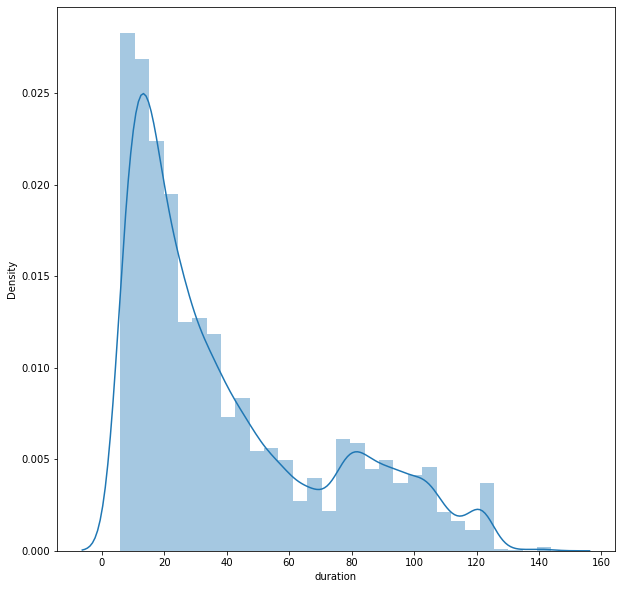

In [76]:
# Visaulize the distribution of he duration variable
plt.figure(figsize = (10, 10))
sns.distplot(telecom_df['duration'],bins=30)
plt.show()

We observe that the duration or tenure of the customer is right skewed and not uniform

#### Let us now construct a bar plot

In [77]:
# Set the intervals for the duration, labels and the bin size
duration_range = [0, 6, 12, 24, 60, 61]
label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_df['duration_range'] = pd.cut(telecom_df['duration'], duration_range, labels=label)
telecom_df['duration_range'].head()

0        2-5 Yrs
1        2-5 Yrs
2    6-12 Months
3        1-2 Yrs
4        1-2 Yrs
Name: duration_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

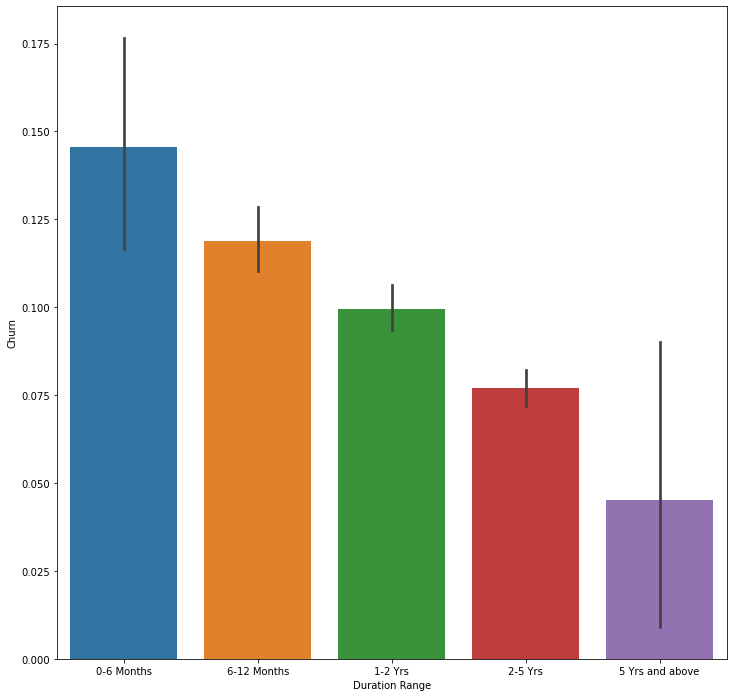

In [78]:
# Plot a bar plot for subscription duration range
plt.figure(figsize=[12,12])
sns.barplot(x='duration_range',y='churn', data=telecom_df)
plt.xlabel("Duration Range")
plt.ylabel("Churn")
plt.show()

We observe that the maximum churn rate occurs during 0-6 month period, after which it gradually decreases which means the customer is retained in the operator network.

In the good phase of customer, the average revenue per user of the customer is given by arpu_6 and arpu_7. As we have two seperate averages, lets take an overall average to these two columns and drop the other columns.

In [79]:
# Calculate the average revenue per user for month 6 and 7 and store in a new column 'avg_arpu_6_7'
telecom_df["avg_arpu_6_7"]= (telecom_df['arpu_6'] + telecom_df['arpu_7'])/2

In [80]:
# check the 'avg_arpu_6_7' column values
telecom_df['avg_arpu_6_7'].head()

0     206.1005
1    1209.5150
2     435.4720
3     556.1030
4     134.1235
Name: avg_arpu_6_7, dtype: float64

In [81]:
# Drop the original columns as new columns are already derived from them
telecom_df.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

In [82]:
# Let us check the updated dimensions of the dataset
telecom_df.shape

(30001, 121)

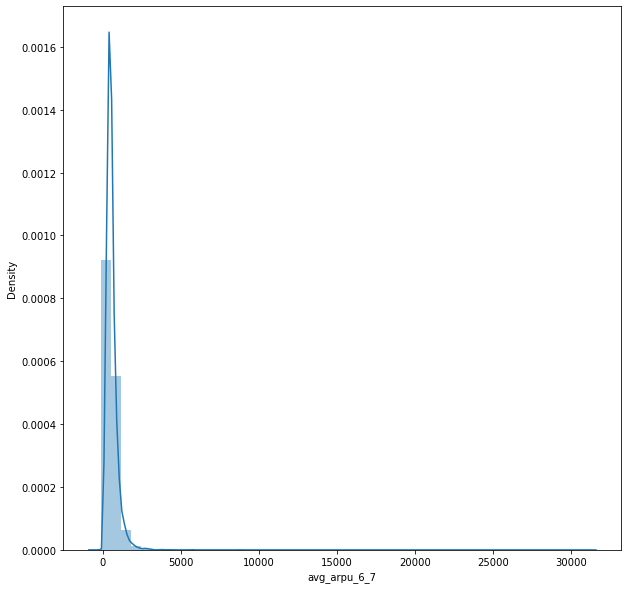

In [83]:
# Plot a distribution plot for visualizing the column 'avg_arpu_6_7'
plt.figure(figsize = (10, 10))
sns.distplot(telecom_df['avg_arpu_6_7'])
plt.show()

We observe that the average revenue per user is not a uniform distribution and right skewed

In [84]:
# Check the correlation with respect to churn and sort them in descending order
churn_corr = telecom_df.corr()[['churn']].sort_values(ascending=False, by='churn')
churn_corr

,churn
churn,1.000000
std_og_mou_6,0.125264
std_og_t2m_mou_6,0.097544
roam_og_mou_7,0.092852
total_og_mou_6,0.078321
onnet_mou_6,0.070100
roam_ic_mou_7,0.068023
roam_og_mou_8,0.067564
roam_og_mou_6,0.064611
total_rech_num_6,0.064596


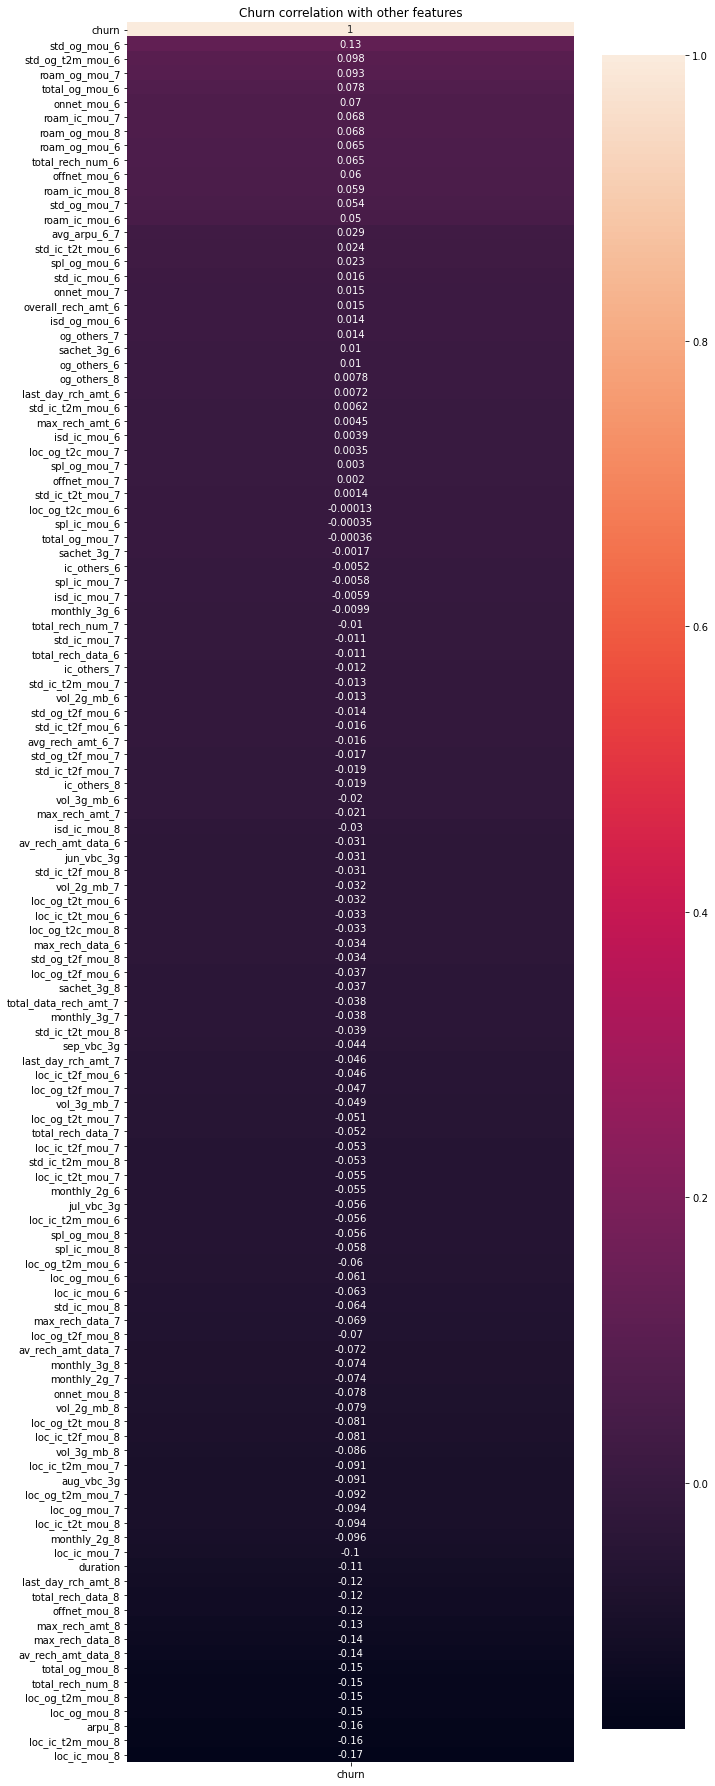

In [85]:
# Plot a heatmap to visually analyze the correlation of churn whith other variables
plt.figure(figsize=(10,32))
sns.heatmap(churn_corr,annot=True).set_title("Churn correlation with other features")
plt.show()

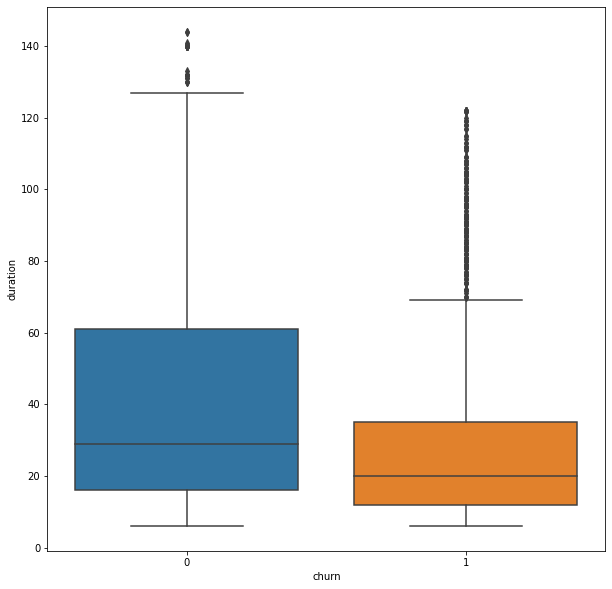

In [86]:
# Draw a box plot between churn and duration
plt.figure(figsize = (10, 10))
sns.boxplot(x = telecom_df["churn"], y = telecom_df["duration"])
plt.show()

From the above plot we observe that customers whose tenure is of longer duration, do not generally churn. We also do observe outliers.

<Figure size 1080x1080 with 0 Axes>

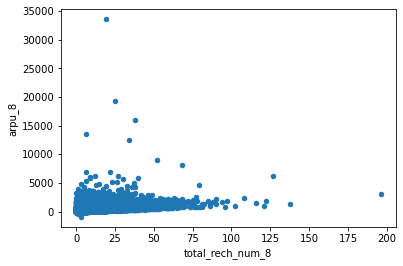

In [87]:
# Draw a scatter plot between total recharge and avg revenue for the 8th month (action phase)
plt.figure(figsize = (15, 15))
telecom_df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

We do not observe any significant trend

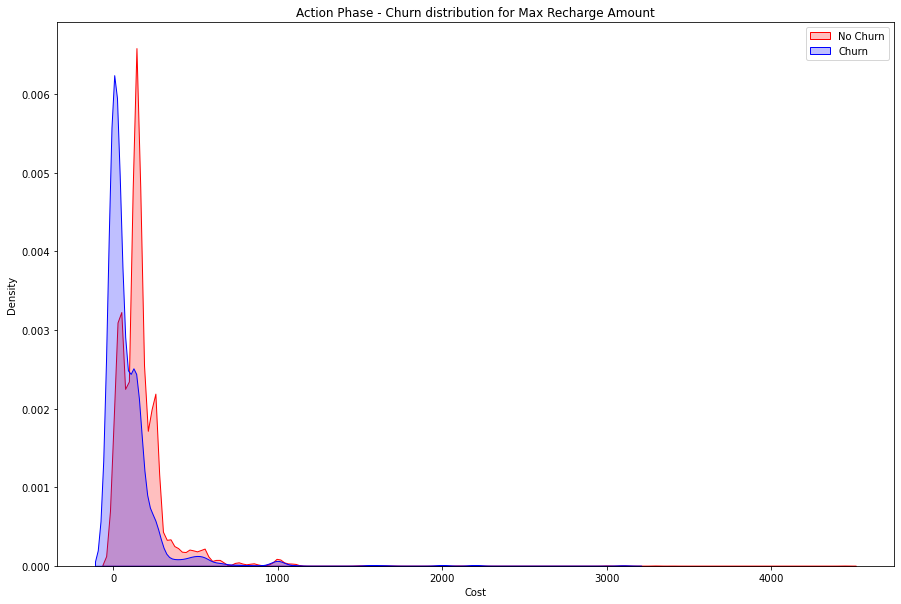

In [88]:
# Plot between churn vs max rechare amount for month 8 (action phase)
max_rech_no_churn = telecom_df["max_rech_amt_8"][(telecom_df["churn"] == 0)]
max_rech_churn = telecom_df["max_rech_amt_8"][(telecom_df["churn"] == 1)]

plt.figure(figsize = (15, 10))
kde = sns.kdeplot(max_rech_no_churn, color="Red", shade = True)
kde = sns.kdeplot(max_rech_churn, ax =kde, color="Blue", shade= True)
kde.legend(["No Churn","Churn"],loc='upper right')
kde.set_ylabel('Density')
kde.set_xlabel('Cost')
kde.set_title('Action Phase - Churn distribution for Max Recharge Amount')
plt.show()

In [89]:
# Create a category for total recharge and total recharge data for month 8
telecom_df['total_rech_data_group_8']=pd.cut(telecom_df['total_rech_data_8'],[-1,0,10,25,100],\
                                             labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
telecom_df['total_rech_num_group_8']=pd.cut(telecom_df['total_rech_num_8'],[-1,0,10,25,1000],\
                                            labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

Distribution of total_rech_data_8 variable
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


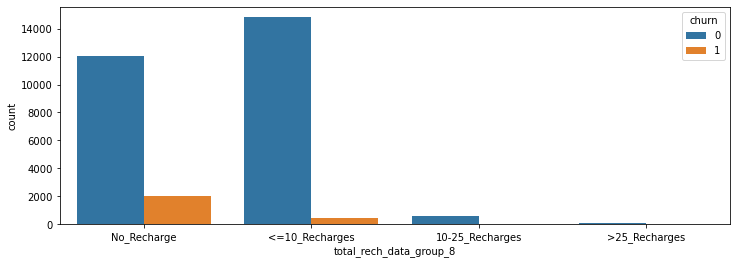

In [90]:
# Plotting the distribution
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_df,x="total_rech_data_group_8",hue="churn")
print("Distribution of total_rech_data_8 variable\n",telecom_df['total_rech_data_group_8'].value_counts())
plt.show()

Distribution of total_rech_num_8 variable
 <=10_Recharges     19349
10-25_Recharges     8245
>25_Recharges       1824
No_Recharge          583
Name: total_rech_num_group_8, dtype: int64


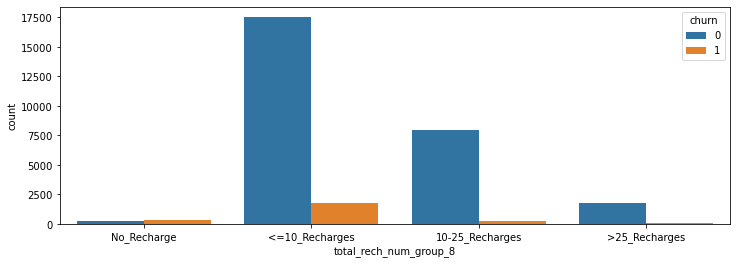

In [91]:
# Plotting the distribution
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_df,x="total_rech_num_group_8",hue="churn")
print("Distribution of total_rech_num_8 variable\n",telecom_df['total_rech_num_group_8'].value_counts())
plt.show()

In [92]:
# Create a dummy variable for the following categorical variables and dropping the first one.
dummy = pd.get_dummies(telecom_df[['total_rech_data_group_8','total_rech_num_group_8','duration_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,duration_range_6-12 Months,duration_range_1-2 Yrs,duration_range_2-5 Yrs,duration_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,1,0,1,0,0
4,1,0,0,1,0,0,0,1,0,0


In [93]:
# Concatenate the results to the master dataframe
telecom_df = pd.concat([telecom_df, dummy], axis=1)
telecom_df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,total_data_rech_amt_7,avg_rech_amt_6_7,churn,duration,duration_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,duration_range_6-12 Months,duration_range_1-2 Yrs,duration_range_2-5 Yrs,duration_range_5 Yrs and above
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,3.58,614.0,252.0,559.0,1,32.0,2-5 Yrs,206.1005,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1,0
1,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,0.0,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,0.00,1580.0,0.0,1185.0,1,27.0,2-5 Yrs,1209.5150,No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
2,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,

In [94]:
# Let us create a copy of the filtered dataframe so to retain the original and not modify it
data =telecom_df[:].copy()

In [95]:
# Drop the unwanted columns
data.drop(['duration_range','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','duration'], axis=1, inplace=True)

In [96]:
# Display the first 5 rows of the dataset
data.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,total_data_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,duration_range_6-12 Months,duration_range_1-2 Yrs,duration_range_2-5 Yrs,duration_range_5 Yrs and above
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,1,1,1,0,0,0,30.40,0.00,101.20,614.0,252.0,559.0,1,206.1005,1,0,0,1,0,0,0,0,1,0
1,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,0.0,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,57.74,19.38,18.74,1580.0,0.0,1185.0,1,1209.5150,0,0,0,1,0,0,0,0,1,0
2,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,0,0,0,0,0,21.03,910.65,122.16,437.0,354.0,696.0,0,435.4720,1,0,0,0,1,0,1,0,0,0
3,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4

## Model Building

<font style="color:green;font-size:16px"> We will now build different models and check the metrics to determine which model is more suitable in this case</font>

In [97]:
# lets create X dataset for model building.
X = data.drop(['churn'],axis=1)
y=data['churn']

In [98]:
# split the dateset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 127)
Dimension of X_test: (9001, 127)


In [99]:
# fetch the numerical columns from training dataset features
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [100]:
# apply scaling on the dataset
scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [101]:
# let us check the features after scaling
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,total_data_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,duration_range_6-12 Months,duration_range_1-2 Yrs,duration_range_2-5 Yrs,duration_range_5 Yrs and above
4788,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.003461,0.003487,0.004268,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.016393,0.055556,0.017544,0.099035,0.099035,0.099035,0.020408,0.046735,0.037922,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.25,0.25,0.2,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003420,0.011111,0.002411,0.063393,1,0,0,1,0,0,0,0,0,0
8447,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001620,0.000000,0.000000,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.040335,0.022862,0.014662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000316,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.040816,0.009227,0.009227,0.008316,0.009227,0.005985,0.005619,0.114754,0.111111,0.105263,0.016077,0.016077,0.016077,0.014445,0.031844,0.034967,0.064367,0.045634,0.035909,0.000332,0.000000,0.000000,0.00,0.00,0.0,0.0,0.000000,0.0000,0.0,0.057143,0.0,0.000000,0.000000,0.0,0.009431,0.015142,0.010484,0.068

### Handling Data Imbalance

Previously we observed that the class is imbalanced since there is a huge difference between churn class. So we will use SMOTE method to balabce this data with respect to churn variable, to make it suitable for further analysis.

<font style="color:red;font-size:15px">Please note that we need to install <b>imblearn</b> library before we can se SMOTE.</font><br> We can use: <font style="color:green;font-size:15px"><b>pip install imblearn</b></font> to install the package.

In [102]:
# Apply smote on the train dataset
smote = SMOTE(random_state=42)
X_train_smote ,y_train_smote = smote.fit_resample(X_train,y_train)

#### Apply Logistic Regression using Statsmodel

In [103]:
# Create a function for building a logistic regression model from statsmodel and returning the summary
def buildstat_model(y_train, X_train_rfe, statsmodel):
    X_train_sm = statsmodel.add_constant(X_train_rfe)
    lr = statsmodel.GLM(y_train, X_train_sm, family = statsmodel.families.Binomial())
    lr_model = lr.fit()
    return lr_model.summary()

In [104]:
buildstat_model(y_train_smote, X_train_smote, statsmodel )

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38448
Model Family:                Binomial   Df Model:                          127
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 27 Oct 2021   Deviance:                       28065.
Time:                        21:39:15   Pearson chi2:                 1.27e+12
No. Iterations:                    13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.5939      0.267      2.228      0.026       0.071       1.116
arpu_8                                      2.3143      1.730      1.338      0.181      -1.076       5.704
onnet_mou_6                                 8.8803     12.855      0.691      0.490     -16.315      34.076
onnet_mou_7                               -54.6734     19.836     -2.756      0.006     -93.552     -15.795
onnet_mou_8                                28.6859     31.993      0.897      0.370     -34.020      91.392
offnet_mou_6                               16.5758     14.070      1.178      0.239     -11.002      44.153
offnet_mou_7                              -62.2465     23.463     -2.653      0.008    -108.234     -16.259
offnet_mou_8                               33.8412     41.612      0.813      0.416     -47.717     115.399
roam_ic_mou_6                               2.9061      0.869      3.342      0.001       1.202       4.610
roam_ic_mou_7                               5.2427      1.612      3.253      0.001       2.084       8.401
roam_ic_mou_8                              -2.6099      0.828     -3.154      0.002      -4.232      -0.988
roam_og_mou_6                              -8.4230      6.466     -1.303      0.193     -21.097       4.251
roam_og_mou_7                              13.5998      4.672      2.911      0.004       4.444      22.756
roam_og_mou_8                              -6.1539     10.479     -0.587      0.557     -26.692      14.384
loc_og_t2t_mou_6                         2.472e+04   1.99e+04      1.240      0.215   -1.44e+04    6.38e+04
loc_og_t2t_mou_7                        -1.205e+04    2.3e+04     -0.524      0.600   -5.71e+04     3.3e+04
loc_og_t2t_mou_8                         2.761e+05   3.46e+04      7.971      0.000    2.08e+05    3.44e+05
loc_og_t2m_mou_6                         1.818e+04   1.47e+04      1.239      0.215   -1.06e+04    4.69e+04
loc_og_t2m_mou_7                        -7263.9829   1.38e+04     -0.525      0.600   -3.44e+04    1.99e+04
loc_og_t2m_mou_8                         9.108e+04   1.14e+04      7.971      0.000    6.87e+04    1.13e+05
loc_og_t2f_mou_6                         2600.8842   2097.525      1.240      0.215   -1510.189    6711.958
loc_og_t2f_mou_7                        -1734.0026   3285.647     -0.528      0.598   -8173.752    4705.746
loc_og_t2f_mou_8                         2.384e+04   2990.943      7.972      0.000     1.8e+04    2.97e+04
loc_og_t2c_mou_6                           -5.8760      1.053     -5.578      0.000      -7.941      -3.811
loc_og_t2c_mou_7                            0.9706      1.863      0.521      0.602      -2.681       4.622
loc_og_t2c_mou_8                            1.4763      1.2

### Logistic Regression using RFE method feature selection

In [105]:
# Logistic regression- RFE with 30 variables
logreg = LogisticRegression()
rfe = RFE(logreg, 30)             
rfe = rfe.fit(X_train_smote, y_train_smote)

In [106]:
# list of 
list(zip(X_train_smote.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 50),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 74),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 14),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 72),
 ('roam_og_mou_6', False, 78),
 ('roam_og_mou_7', False, 27),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 68),
 ('loc_og_t2t_mou_7', False, 94),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 96),
 ('loc_og_t2m_mou_7', False, 56),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 32),
 ('loc_og_t2f_mou_7', False, 3),
 ('loc_og_t2f_mou_8', False, 18),
 ('loc_og_t2c_mou_6', False, 2),
 ('loc_og_t2c_mou_7', False, 59),
 ('loc_og_t2c_mou_8', False, 95),
 ('loc_og_mou_6', False, 93),
 ('loc_og_mou_7', False, 79),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 87),
 ('std_og_t2f_mou_6', False, 38),
 ('std_og_t2f_mou_7', False, 23),
 ('std_og_t2f_mou_8', True, 1),
 ('

In [107]:
# Let us pack the RFE properties in a dataframe for easy sorting by rank
rfe_properties={'Column':X_train_smote.columns, 'Support':rfe.support_, 'Ranking':rfe.ranking_}
rfe_dataframe = pd.DataFrame(rfe_properties)

In [108]:
# Display the RFE dataframe in ascending order of ranking
rfe_dataframe.sort_values(by='Ranking').reset_index(drop=True)

,Column,Support,Ranking
0,arpu_8,True,1
1,loc_og_mou_8,True,1
2,std_og_t2f_mou_8,True,1
3,total_rech_num_7,True,1
4,spl_og_mou_8,True,1
5,total_og_mou_8,True,1
6,loc_ic_t2t_mou_8,True,1
7,loc_ic_t2m_mou_6,True,1
8,loc_ic_t2m_mou_8,True,1
9,total_rech_data_8,True,1


In [109]:
# Build the 1st iteration Model with the rfe supported columns
cols = X_train_smote.columns[rfe.support_]
X_train_rfe = X_train_smote[cols]
buildstat_model(y_train_smote, X_train_rfe, statsmodel)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38545
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14802.
Date:                Wed, 27 Oct 2021   Deviance:                       29604.
Time:                        21:40:00   Pearson chi2:                 3.40e+13
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7969      0.071     11.221      0.000       0.658       0.936
arpu_8                 3.3516      1.300      2.579      0.010       0.804       5.899
onnet_mou_7            3.3817      0.526      6.427      0.000       2.350       4.413
onnet_mou_8           -4.6981     19.317     -0.243      0.808     -42.559      33.162
offnet_mou_7           5.2819      0.602      8.778      0.000       4.102       6.461
offnet_mou_8          -8.2743     25.161     -0.329      0.742     -57.588      41.040
roam_ic_mou_7          5.4509      0.914      5.961      0.000       3.659       7.243
roam_og_mou_8          3.3987      6.361      0.534      0.593      -9.068      15.865
loc_og_t2t_mou_8      25.0774     18.589      1.349      0.177     -11.357      61.512
loc_og_t2m_mou_8       7.2523      6.174      1.175      0.240      -4.848      19.353
loc_og_mou_8         -42.0061     18.844     -2.229      0.026     -78.939      -5.073
std_og_t2f_mou_8     -10.1755      1.978     -5.145      0.000     -14.052      -6.299
spl_og_mou_8          -3.4187      1.247     -2.741      0.006      -5.863      -0.974
total_og_mou_8        -7.4389     25.337     -0.294      0.769     -57.099      42.221
loc_ic_t2t_mou_8    2.695e+05    1.1e+04     24.481      0.000    2.48e+05    2.91e+05
loc_ic_t2m_mou_6       8.0297      0.707     11.362      0.000       6.645       9.415
loc_ic_t2m_mou_8    2.971e+05   1.21e+04     24.480      0.000    2.73e+05    3.21e+05
loc_ic_t2f_mou_8     1.07e+05   4369.299     24.481      0.000    9.84e+04    1.16e+05
loc_ic_mou_8       -3.629e+05   1.48e+04    -24.483      0.000   -3.92e+05   -3.34e+05
std_ic_t2m_mou_8       4.3404      3.512      1.236      0.217      -2.543      11.224
std_ic_mou_8         -14.4511      2.958     -4.886      0.000     -20.249      -8.654
spl_ic_mou_8         -27.9756      1.789    -15.642      0.000     -31.481     -24.470
total_rech_num_7       4.5764      0.405     11.304      0.000       3.783       5.370
total_rech_num_8     -11.8529      0.772    -15.349      0.000     -13.366     -10.339
last_day_rch_amt_8   -15.8969      0.797    -19.936      0.000     -17.460     -14.334
total_rech_data_8     -6.7260      0.596    -11.284      0.000      -7.894      -5.558
av_rech_amt_data_8    -7.3327      0.635    -11.544      0.000      -8.578      -6.088
vol_2g_mb_8           -9.6452      0.924    -10.437      0.000     -11.457      -7.834
monthly_2g_8          -5.1996      0.366    -14.219      0.000      -5.916      -4.483
aug_vbc_3g            -4.8094      0.569     -8.459      0.000      -5.924      -3.695
avg_arpu_6_7          11.1819      1.160      9.641      0.000       8.909      13.455
======================================================================================
"""

We observe that the variable <font style="color:red;font-weight:bold">'onnet_mou_8'</font> has a high P value of '.808', hence we drop this column.

In [110]:
# Drop the 'arpu_8' column and display the updated columns list
cols=cols.drop('onnet_mou_8',1)
cols

Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g',
       'avg_arpu_6_7'],
      dtype='object')

In [111]:
# Build the 2nd iteration Model with the rfe supported columns
X_train_rfe = X_train_smote[cols]
buildstat_model(y_train_smote, X_train_rfe, statsmodel)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38546
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14802.
Date:                Wed, 27 Oct 2021   Deviance:                       29604.
Time:                        21:40:00   Pearson chi2:                 3.33e+13
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7946      0.070     11.273      0.000       0.656       0.933
arpu_8                 3.4229      1.267      2.701      0.007       0.939       5.907
onnet_mou_7            3.3800      0.526      6.424      0.000       2.349       4.411
offnet_mou_7           5.2824      0.602      8.779      0.000       4.103       6.462
offnet_mou_8          -2.1671      1.602     -1.353      0.176      -5.306       0.972
roam_ic_mou_7          5.4483      0.915      5.957      0.000       3.656       7.241
roam_og_mou_8          1.8601      0.656      2.835      0.005       0.574       3.146
loc_og_t2t_mou_8      25.1575     18.588      1.353      0.176     -11.275      61.590
loc_og_t2m_mou_8       7.2771      6.174      1.179      0.238      -4.823      19.377
loc_og_mou_8         -42.0948     18.842     -2.234      0.025     -79.024      -5.165
std_og_t2f_mou_8     -10.1797      1.978     -5.147      0.000     -14.056      -6.303
spl_og_mou_8          -3.3248      1.183     -2.810      0.005      -5.644      -1.006
total_og_mou_8       -13.5939      1.219    -11.154      0.000     -15.983     -11.205
loc_ic_t2t_mou_8    2.696e+05    1.1e+04     24.497      0.000    2.48e+05    2.91e+05
loc_ic_t2m_mou_6       8.0291      0.707     11.361      0.000       6.644       9.414
loc_ic_t2m_mou_8    2.972e+05   1.21e+04     24.496      0.000    2.73e+05    3.21e+05
loc_ic_t2f_mou_8     1.07e+05   4367.640     24.497      0.000    9.84e+04    1.16e+05
loc_ic_mou_8        -3.63e+05   1.48e+04    -24.499      0.000   -3.92e+05   -3.34e+05
std_ic_t2m_mou_8       4.3383      3.512      1.235      0.217      -2.546      11.222
std_ic_mou_8         -14.4548      2.958     -4.887      0.000     -20.252      -8.657
spl_ic_mou_8         -27.9713      1.788    -15.640      0.000     -31.477     -24.466
total_rech_num_7       4.5779      0.405     11.308      0.000       3.784       5.371
total_rech_num_8     -11.8512      0.772    -15.348      0.000     -13.365     -10.338
last_day_rch_amt_8   -15.9112      0.796    -20.000      0.000     -17.471     -14.352
total_rech_data_8     -6.7258      0.596    -11.283      0.000      -7.894      -5.557
av_rech_amt_data_8    -7.3447      0.633    -11.594      0.000      -8.586      -6.103
vol_2g_mb_8           -9.6467      0.924    -10.439      0.000     -11.458      -7.835
monthly_2g_8          -5.2004      0.366    -14.222      0.000      -5.917      -4.484
aug_vbc_3g            -4.8125      0.568     -8.467      0.000      -5.927      -3.698
avg_arpu_6_7          11.1870      1.160      9.644      0.000       8.913      13.461
======================================================================================
"""

We observe that the variable <font style="color:red;font-weight:bold">'loc_og_t2m_mou_8'</font> has a high p value of '.238', hence we drop this column.

In [112]:
# Drop the 'total_og_mou_8' column and display the updated columns list
cols=cols.drop('loc_og_t2m_mou_8',1)

In [113]:
# Build the 3rd iteration Model with the rfe supported columns
X_train_rfe = X_train_smote[cols]
buildstat_model(y_train_smote, X_train_rfe, statsmodel)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38547
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14803.
Date:                Wed, 27 Oct 2021   Deviance:                       29606.
Time:                        21:40:00   Pearson chi2:                 3.40e+13
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7953      0.070     11.310      0.000       0.657       0.933
arpu_8                 3.2999      1.259      2.620      0.009       0.832       5.768
onnet_mou_7            3.3882      0.526      6.440      0.000       2.357       4.419
offnet_mou_7           5.2913      0.602      8.793      0.000       4.112       6.471
offnet_mou_8          -2.1637      1.602     -1.351      0.177      -5.303       0.976
roam_ic_mou_7          5.4642      0.914      5.976      0.000       3.672       7.256
roam_og_mou_8          1.8890      0.656      2.881      0.004       0.604       3.174
loc_og_t2t_mou_8       3.6967      3.625      1.020      0.308      -3.408      10.801
loc_og_mou_8         -20.0579      2.149     -9.335      0.000     -24.269     -15.846
std_og_t2f_mou_8     -10.3386      1.981     -5.218      0.000     -14.222      -6.455
spl_og_mou_8          -3.3347      1.183     -2.818      0.005      -5.654      -1.015
total_og_mou_8       -13.5386      1.217    -11.121      0.000     -15.925     -11.152
loc_ic_t2t_mou_8      2.7e+05    1.1e+04     24.546      0.000    2.48e+05    2.92e+05
loc_ic_t2m_mou_6       8.0502      0.707     11.391      0.000       6.665       9.435
loc_ic_t2m_mou_8    2.976e+05   1.21e+04     24.546      0.000    2.74e+05    3.21e+05
loc_ic_t2f_mou_8    1.072e+05   4365.482     24.547      0.000    9.86e+04    1.16e+05
loc_ic_mou_8       -3.635e+05   1.48e+04    -24.548      0.000   -3.93e+05   -3.34e+05
std_ic_t2m_mou_8       4.4128      3.516      1.255      0.209      -2.479      11.304
std_ic_mou_8         -14.5503      2.961     -4.914      0.000     -20.353      -8.747
spl_ic_mou_8         -27.9527      1.788    -15.631      0.000     -31.458     -24.448
total_rech_num_7       4.5854      0.405     11.327      0.000       3.792       5.379
total_rech_num_8     -11.8377      0.772    -15.340      0.000     -13.350     -10.325
last_day_rch_amt_8   -15.9157      0.795    -20.028      0.000     -17.473     -14.358
total_rech_data_8     -6.7092      0.596    -11.264      0.000      -7.877      -5.542
av_rech_amt_data_8    -7.3222      0.633    -11.573      0.000      -8.562      -6.082
vol_2g_mb_8           -9.6365      0.924    -10.430      0.000     -11.447      -7.826
monthly_2g_8          -5.1954      0.366    -14.210      0.000      -5.912      -4.479
aug_vbc_3g            -4.8193      0.568     -8.478      0.000      -5.933      -3.705
avg_arpu_6_7          11.2012      1.159      9.665      0.000       8.930      13.473
======================================================================================
"""

In [114]:
# Drop the 'loc_og_t2t_mou_8' column as its p value is high and display the updated columns list
cols=cols.drop('loc_og_t2t_mou_8',1)

In [115]:
# Build the 4th iteration Model with the rfe supported columns
X_train_rfe = X_train_smote[cols]
buildstat_model(y_train_smote, X_train_rfe, statsmodel)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38548
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14803.
Date:                Wed, 27 Oct 2021   Deviance:                       29607.
Time:                        21:40:01   Pearson chi2:                 3.36e+13
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7975      0.070     11.370      0.000       0.660       0.935
arpu_8                 3.2356      1.256      2.577      0.010       0.774       5.697
onnet_mou_7            3.4163      0.526      6.495      0.000       2.385       4.447
offnet_mou_7           5.2940      0.602      8.798      0.000       4.115       6.473
offnet_mou_8          -2.3361      1.594     -1.465      0.143      -5.461       0.789
roam_ic_mou_7          5.4618      0.914      5.975      0.000       3.670       7.254
roam_og_mou_8          1.9316      0.654      2.952      0.003       0.649       3.214
loc_og_mou_8         -18.5568      1.537    -12.073      0.000     -21.569     -15.544
std_og_t2f_mou_8     -10.3647      1.981     -5.231      0.000     -14.248      -6.481
spl_og_mou_8          -3.3344      1.184     -2.817      0.005      -5.655      -1.014
total_og_mou_8       -13.4595      1.215    -11.079      0.000     -15.841     -11.078
loc_ic_t2t_mou_8    2.702e+05    1.1e+04     24.563      0.000    2.49e+05    2.92e+05
loc_ic_t2m_mou_6       8.0444      0.707     11.382      0.000       6.659       9.430
loc_ic_t2m_mou_8    2.978e+05   1.21e+04     24.562      0.000    2.74e+05    3.22e+05
loc_ic_t2f_mou_8    1.072e+05   4364.976     24.563      0.000    9.87e+04    1.16e+05
loc_ic_mou_8       -3.637e+05   1.48e+04    -24.565      0.000   -3.93e+05   -3.35e+05
std_ic_t2m_mou_8       4.5350      3.515      1.290      0.197      -2.355      11.425
std_ic_mou_8         -14.6318      2.962     -4.940      0.000     -20.437      -8.826
spl_ic_mou_8         -27.9287      1.788    -15.622      0.000     -31.433     -24.425
total_rech_num_7       4.5885      0.405     11.332      0.000       3.795       5.382
total_rech_num_8     -11.8393      0.772    -15.343      0.000     -13.352     -10.327
last_day_rch_amt_8   -15.9146      0.794    -20.037      0.000     -17.471     -14.358
total_rech_data_8     -6.7097      0.596    -11.266      0.000      -7.877      -5.542
av_rech_amt_data_8    -7.3093      0.632    -11.560      0.000      -8.549      -6.070
vol_2g_mb_8           -9.6239      0.924    -10.418      0.000     -11.434      -7.813
monthly_2g_8          -5.1991      0.366    -14.221      0.000      -5.916      -4.483
aug_vbc_3g            -4.8139      0.568     -8.470      0.000      -5.928      -3.700
avg_arpu_6_7          11.1876      1.158      9.663      0.000       8.918      13.457
======================================================================================
"""

In [116]:
# Drop the 'std_ic_t2m_mou_8' column as its p value is high and display the updated columns list
cols=cols.drop('std_ic_t2m_mou_8',1)

In [117]:
# Build the 5th iteration Model with the rfe supported columns
X_train_rfe = X_train_smote[cols]
buildstat_model(y_train_smote, X_train_rfe, statsmodel)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38549
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14804.
Date:                Wed, 27 Oct 2021   Deviance:                       29609.
Time:                        21:40:01   Pearson chi2:                 3.27e+13
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8002      0.070     11.417      0.000       0.663       0.938
arpu_8                 3.2534      1.255      2.591      0.010       0.793       5.714
onnet_mou_7            3.3890      0.525      6.454      0.000       2.360       4.418
offnet_mou_7           5.3156      0.602      8.835      0.000       4.136       6.495
offnet_mou_8          -2.2091      1.591     -1.388      0.165      -5.328       0.909
roam_ic_mou_7          5.4212      0.912      5.946      0.000       3.634       7.208
roam_og_mou_8          1.9266      0.654      2.945      0.003       0.645       3.209
loc_og_mou_8         -18.5734      1.538    -12.076      0.000     -21.588     -15.559
std_og_t2f_mou_8     -10.4784      1.982     -5.286      0.000     -14.364      -6.593
spl_og_mou_8          -3.3458      1.184     -2.826      0.005      -5.666      -1.025
total_og_mou_8       -13.5281      1.214    -11.147      0.000     -15.907     -11.149
loc_ic_t2t_mou_8    2.704e+05    1.1e+04     24.583      0.000    2.49e+05    2.92e+05
loc_ic_t2m_mou_6       8.0493      0.707     11.390      0.000       6.664       9.434
loc_ic_t2m_mou_8     2.98e+05   1.21e+04     24.582      0.000    2.74e+05    3.22e+05
loc_ic_t2f_mou_8    1.073e+05   4364.679     24.583      0.000    9.87e+04    1.16e+05
loc_ic_mou_8        -3.64e+05   1.48e+04    -24.585      0.000   -3.93e+05   -3.35e+05
std_ic_mou_8         -11.3581      1.415     -8.026      0.000     -14.132      -8.585
spl_ic_mou_8         -27.9080      1.788    -15.613      0.000     -31.412     -24.405
total_rech_num_7       4.5971      0.405     11.356      0.000       3.804       5.391
total_rech_num_8     -11.8568      0.771    -15.369      0.000     -13.369     -10.345
last_day_rch_amt_8   -15.9094      0.794    -20.038      0.000     -17.466     -14.353
total_rech_data_8     -6.7098      0.596    -11.266      0.000      -7.877      -5.542
av_rech_amt_data_8    -7.3162      0.632    -11.572      0.000      -8.555      -6.077
vol_2g_mb_8           -9.6131      0.923    -10.410      0.000     -11.423      -7.803
monthly_2g_8          -5.2000      0.366    -14.224      0.000      -5.917      -4.484
aug_vbc_3g            -4.8090      0.568     -8.461      0.000      -5.923      -3.695
avg_arpu_6_7          11.1457      1.157      9.635      0.000       8.878      13.413
======================================================================================
"""

In [118]:
# Drop the 'offnet_mou_8' column as its p value is high and display the updated columns list
cols=cols.drop('offnet_mou_8',1)

In [119]:
# Build the 6th iteration Model with the rfe supported columns
X_train_rfe = X_train_smote[cols]
buildstat_model(y_train_smote, X_train_rfe, statsmodel)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38550
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14805.
Date:                Wed, 27 Oct 2021   Deviance:                       29611.
Time:                        21:40:01   Pearson chi2:                 3.34e+13
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7985      0.070     11.388      0.000       0.661       0.936
arpu_8                 3.1969      1.255      2.548      0.011       0.738       5.656
onnet_mou_7            3.7881      0.443      8.555      0.000       2.920       4.656
offnet_mou_7           4.8830      0.510      9.567      0.000       3.883       5.883
roam_ic_mou_7          5.4198      0.913      5.939      0.000       3.631       7.208
roam_og_mou_8          1.6136      0.612      2.639      0.008       0.415       2.812
loc_og_mou_8         -18.7686      1.533    -12.241      0.000     -21.774     -15.763
std_og_t2f_mou_8     -10.5174      1.983     -5.304      0.000     -14.404      -6.631
spl_og_mou_8          -3.3695      1.186     -2.842      0.004      -5.693      -1.046
total_og_mou_8       -14.6236      0.931    -15.700      0.000     -16.449     -12.798
loc_ic_t2t_mou_8    2.701e+05    1.1e+04     24.564      0.000    2.49e+05    2.92e+05
loc_ic_t2m_mou_6       8.0965      0.706     11.468      0.000       6.713       9.480
loc_ic_t2m_mou_8    2.976e+05   1.21e+04     24.563      0.000    2.74e+05    3.21e+05
loc_ic_t2f_mou_8    1.072e+05   4362.715     24.564      0.000    9.86e+04    1.16e+05
loc_ic_mou_8       -3.635e+05   1.48e+04    -24.565      0.000   -3.93e+05   -3.35e+05
std_ic_mou_8         -11.4063      1.415     -8.058      0.000     -14.181      -8.632
spl_ic_mou_8         -27.9209      1.787    -15.627      0.000     -31.423     -24.419
total_rech_num_7       4.6063      0.405     11.387      0.000       3.813       5.399
total_rech_num_8     -11.8552      0.771    -15.369      0.000     -13.367     -10.343
last_day_rch_amt_8   -15.8979      0.794    -20.019      0.000     -17.454     -14.341
total_rech_data_8     -6.7204      0.596    -11.282      0.000      -7.888      -5.553
av_rech_amt_data_8    -7.3173      0.632    -11.572      0.000      -8.557      -6.078
vol_2g_mb_8           -9.6128      0.924    -10.407      0.000     -11.423      -7.802
monthly_2g_8          -5.2012      0.366    -14.228      0.000      -5.918      -4.485
aug_vbc_3g            -4.8030      0.568     -8.453      0.000      -5.917      -3.689
avg_arpu_6_7          11.1886      1.157      9.673      0.000       8.921      13.456
======================================================================================
"""

#### Make Prediction

In [120]:
# Let us once again train and build the final model for further Analysis with the final columns left
X_train_SM = statsmodel.add_constant(X_train_smote[cols])
lr = statsmodel.GLM(y_train_smote,X_train_SM, family = statsmodel.families.Binomial())
res = lr.fit()

In [121]:
# Getting the predicted values on the train set
y_train_smote_pred = res.predict(X_train_SM)
y_train_smote_pred = y_train_smote_pred.values.reshape(-1)
y_train_smote_pred[:10]

array([2.14818537e-01, 3.66443823e-01, 3.11008071e-01, 4.03113518e-01,
       5.65541708e-01, 2.81053523e-01, 5.25968897e-06, 3.25049720e-01,
       1.64192637e-02, 6.49374661e-01])

Let us create a dataframe with the actual churn flag and the predicted probability

In [122]:
y_train_smote_pred_final = pd.DataFrame({'Actual Churn':y_train_smote.values, 'Probability':y_train_smote_pred})
y_train_smote_pred_final.head()

,Actual Churn,Probability
0,0,0.214819
1,0,0.366444
2,0,0.311008
3,0,0.403114
4,0,0.565542


Creating new column 'churn_prediction' with 1 if Churn_Prob > 0.5 else 0

In [123]:
# Create the new column 'churn_prediction'
y_train_smote_pred_final['churn_prediction'] = y_train_smote_pred_final["Probability"].map(lambda x: 1 if x > 0.5 else 0)

In [124]:
# Display the prediction results
y_train_smote_pred_final

,Actual Churn,Probability,churn_prediction
0,0,0.214819,0
1,0,0.366444,0
2,0,0.311008,0
3,0,0.403114,0
4,0,0.565542,1
...,...,...,...
38571,1,0.891148,1
38572,1,0.847882,1
38573,1,0.909375,1
38574,1,0.416110,0


In [125]:
# Encodings for color and format of string to format our output (only for beautfying purpose)
GREEN = '\033[92m'
BLUE = '\033[94m'
RED = '\033[31m'
BOLD = '\033[1m'
END = '\033[0m'

# message in blue and green
message_bg = BOLD+BLUE+"{0}"+END+BOLD+GREEN+"{1}"+END
# message in black and red
message_br = BOLD+"{0}"+END+BOLD+RED+"{1}"+END

In [126]:
# Confusion matrix 
cnf = metrics.confusion_matrix(y_train_smote_pred_final["Actual Churn"], y_train_smote_pred_final["churn_prediction"] )
cnf

array([[15978,  3310],
       [ 2881, 16407]], dtype=int64)

In [127]:
# Determine the accuracy
accuracy = metrics.accuracy_score(y_train_smote_pred_final["Actual Churn"], y_train_smote_pred_final["churn_prediction"])
print(message_bg.format("The overall accuracy of the model is: ", accuracy))

The overall accuracy of the model is: 0.8395116134384073


Other Metrics

In [128]:
TP = cnf[1,1] # true positive 
TN = cnf[0,0] # true negatives
FP = cnf[0,1] # false positives
FN = cnf[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
print(message_bg.format("The Sensitivity of the model is: ", (TP / float(TP+FN))))

The Sensitivity of the model is: 0.8506325176275404


In [130]:
# Let us calculate specificity
print(message_bg.format("The Specifity of the model is: ",TN / float(TN+FP)))

The Specifity of the model is: 0.8283907092492742


In [131]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(message_br.format("The False Positive Rate is: ",FP/ float(TN+FP)))

The False Positive Rate is: 0.17160929075072584


In [132]:
# positive predictive value 
print(message_bg.format("The Precision is: ",TP / float(TP+FP)))

The Precision is: 0.8321245625602273


In [133]:
# Negative predictive value
print(message_bg.format("The True Negative Prediction Rate is: ",TN / float(TN+ FN)))

The True Negative Prediction Rate is: 0.8472347420329815


#### ROC Curve

In [134]:
# Defining a function to plot the roc curve
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [135]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_smote_pred_final["Actual Churn"],\
                                         y_train_smote_pred_final["churn_prediction"],\
                                         drop_intermediate = False )

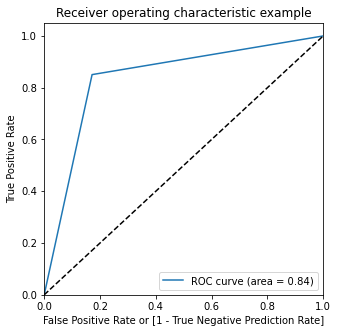

In [136]:
# Plotting the curve for the obtained metrics
plot_roc(y_train_smote_pred_final["Actual Churn"], y_train_smote_pred_final["churn_prediction"])

#### Finding the Optimal Cutoff Point

In [137]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_smote_pred_final[i]= y_train_smote_pred_final["Probability"].map(lambda x: 1 if x > i else 0)
y_train_smote_pred_final.head()

,Actual Churn,Probability,churn_prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.214819,0,1,1,1,0,0,0,0,0,0,0
1,0,0.366444,0,1,1,1,1,0,0,0,0,0,0
2,0,0.311008,0,1,1,1,1,0,0,0,0,0,0
3,0,0.403114,0,1,1,1,1,1,0,0,0,0,0
4,0,0.565542,1,1,1,1,1,1,1,0,0,0,0


In [138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_smote_pred_final["Actual Churn"], y_train_smote_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.708057     0.978588     0.437526
0.2          0.2  0.772216     0.956916     0.587516
0.3          0.3  0.808845     0.929542     0.688148
0.4          0.4  0.827898     0.891383     0.764413
0.5          0.5  0.839512     0.850633     0.828391
0.6          0.6  0.840315     0.801379     0.879251
0.7          0.7  0.830309     0.741394     0.919224
0.8          0.8  0.799901     0.649834     0.949969
0.9          0.9  0.657611     0.334820     0.980402


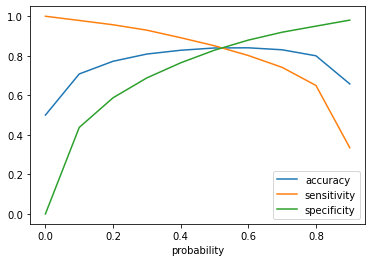

In [139]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Initially we selected the optimm point of classification as 0.5.

From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweak a little more within this range.

In [140]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_smote_pred_final[i]= y_train_smote_pred_final["Probability"].map(lambda x: 1 if x > i else 0)
y_train_smote_pred_final.head()

,Actual Churn,Probability,churn_prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.214819,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.366444,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.311008,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.403114,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.565542,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0


In [141]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_smote_pred_final["Actual Churn"], y_train_smote_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.839512     0.850633     0.828391
0.51         0.51  0.839693     0.846070     0.833316
0.52         0.52  0.840419     0.841974     0.838864
0.53         0.53  0.840471     0.836842     0.844100
0.54         0.54  0.840600     0.831657     0.849544
0.55         0.55  0.841093     0.826576     0.855610
0.56         0.56  0.841326     0.821651     0.861002
0.57         0.57  0.841171     0.816829     0.865512
0.58         0.58  0.840756     0.811282     0.870230
0.59         0.59  0.840419     0.805890     0.874948


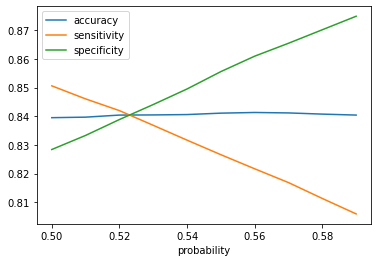

In [142]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.525

In [143]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_smote_pred_final['final_churn_pred'] = y_train_smote_pred_final["Probability"].map( lambda x: 1 if x > 0.525 else 0)

y_train_smote_pred_final.head()

,Actual Churn,Probability,churn_prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.214819,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.366444,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.311008,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.403114,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.565542,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1


In [144]:
# Calculating the ovearall accuracy again
print(message_bg.format("The overall accuracy of the model is: ",\
                        metrics.accuracy_score(y_train_smote_pred_final["Actual Churn"],\
                                                                         y_train_smote_pred_final["final_churn_pred"])))

The overall accuracy of the model is: 0.8406003732890917


In [145]:
cnf2 = metrics.confusion_matrix(y_train_smote_pred_final["Actual Churn"], \
                                                                        y_train_smote_pred_final["churn_prediction"])
print(cnf2)

[[15978  3310]
 [ 2881 16407]]


In [146]:
TP2 = cnf2[1,1] # true positive 
TN2 = cnf2[0,0] # true negatives
FP2 = cnf2[0,1] # false positives
FN2 = cnf2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
print(message_bg.format("The Sensitivity of the model is: ",TP2 / float(TP2+FN2)))

The Sensitivity of the model is: 0.8506325176275404


In [148]:
# Let us calculate specificity
print(message_bg.format("The Specifity of the model is: ", TN2 / float(TN2+FP2)))

The Specifity of the model is: 0.8283907092492742


In [149]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(message_br.format("The False Positive Rate is: ", FP2/ float(TN2+FP2)))

The False Positive Rate is: 0.17160929075072584


In [150]:
# positive predictive value 
print(message_bg.format("The Precision is: ", TP2 / float(TP2+FP2)))

The Precision is: 0.8321245625602273


In [151]:
# Negative predictive value
print(message_bg.format("The True Negative Prediction Rate is: ", TN2 / float(TN2 + FN2)))

The True Negative Prediction Rate is: 0.8472347420329815


#### Precision and recall tradeoff

In [152]:
p, r, thresholds = precision_recall_curve(y_train_smote_pred_final["Actual Churn"],y_train_smote_pred_final["Probability"])

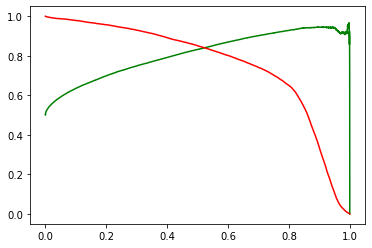

In [153]:
# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Now let us make predictions on the test set

In [154]:
# Apply scaling on the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,total_data_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,duration_range_6-12 Months,duration_range_1-2 Yrs,duration_range_2-5 Yrs,duration_range_5 Yrs and above
10747,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000249,0.000000,0.000000,0.003565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001734,0.000000,0.000000,0.001402,0.000000,0.000000,0.0,0.019587,0.000000,0.0,0.000000,0.004941,0.000000,0.000000,0.0,0.0,0.017204,0.000489,0.000053,0.001493,0.001937,0.000162,0.003225,0.002280,0.002466,0.000077,0.000000,0.002178,0.003321,0.003182,0.002782,0.000000,0.000041,0.000023,0.001853,0.000000,0.010098,0.0,0.0,0.0,0.001572,0.000036,0.009587,0.0,0.018753,0.000000,0.000053,0.000000,0.000000,0.0,0.000000,0.0,0.016287,0.050725,0.010204,0.022444,0.006234,0.002248,0.004239,0.002494,0.000000,0.016393,0.092593,0.000000,0.010932,0.016077,0.000000,0.002253,0.028637,0.000000,0.008393,0.041051,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.002203,0.011347,0.000033,0.059622,0,0,0,1,0,0,1,0,0,0
12573,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.006489,0.004028,0.002058,0.000516,0.003132,0.005379,0.000000,0.001285,0.000409,0.000000,0.036826,0.0,0.004151,0.005882,0.003767,0.010557,0.004741,0.018985,0.0,0.010802,0.018971,0.0,0.000000,0.020936,0.000000,0.000000,0.0,0.0,0.012674,0.024301,0.009067,0.025150,0.049448,0.023064,0.002868,0.011624,0.005979,0.000000,0.000000,0.000000,0.023235,0.051159,0.022029,0.003628,0.011922,0.005535,0.018785,0.038543,0.004938,0.0,0.0,0.0,0.019560,0.030083,0.008684,0.0,0.000000,0.000000,0.000000,0.006005,0.000000,0.0,0.012541,0.0,0.009772,0.043478,0.020408,0.049875,0.037406,0.032592,0.049875,0.021446,0.011238,0.032787,0.018519,0.017544,0.097749,0.093248,0.093248,0.040286,0.033219,0.035705,0.002835,0.002872,0.004586,0.001774,0.029730,0.009727,0.00,0.0,0.0,0.000000,0.071429,0.0625,0.034483,0.0,0.0,0.019572,0.057999,0.000000,0.008444

In [155]:
# Feature selection
X_test=X_test[cols]
X_test.head()

,arpu_8,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_8,loc_og_mou_8,std_og_t2f_mou_8,spl_og_mou_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_7,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,avg_arpu_6_7
10747,0.026143,0.000000,0.000575,0.000000,0.000000,0.000000,0.0,0.000000,0.000053,0.000162,0.003225,0.002466,0.002178,0.002782,0.009587,0.000000,0.050725,0.010204,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059622
12573,0.048190,0.005250,0.023873,0.000000,0.000000,0.003767,0.0,0.000000,0.009067,0.023064,0.002868,0.005979,0.000000,0.022029,0.008684,0.000000,0.043478,0.020408,0.011238,0.017544,0.035705,0.004586,0.0,0.019572,0.075152
29677,0.061230,0.037889,0.025458,0.000000,0.000000,0.031784,0.0,0.000000,0.024987,0.046670,0.055421,0.180698,0.002537,0.183375,0.003706,0.000000,0.079710,0.035714,0.029220,0.035088,0.124107,0.056568,0.0,0.211621,0.095894
8856,0.042998,0.000963,0.003828,0.000000,0.000000,0.000000,0.0,0.008413,0.000800,0.000000,0.002576,0.000000,0.000126,0.000037,0.011386,0.000000,0.072464,0.025510,0.034615,0.052632,0.063039,0.008221,0.2,0.068735,0.070960
21098,0.098384,0.011111,0.242612,0.000721,0.031491,0.017644,0.0,0.001896,0.157573,0.012298,0.028465,0.068991,0.001958,0.066205,0.002352,0.080257,0.108696,0.061224,0.029220,0.017544,0.005664,0.000000,0.0,0.000000,0.101081


In [156]:
# Adding constant to the test model.
X_test_SM = statsmodel.add_constant(X_test)

In [157]:
# Predict the variable
y_test_pred = res.predict(X_test_SM)

In [158]:
# Display the first 10 predicted values for probability
print("The first ten probability value of the prediction are: {0}".format(y_test_pred[:10]))

The first ten probability value of the prediction are: 10747    0.817024
12573    0.588975
29677    0.000228
8856     0.234957
21098    0.006808
17458    0.205531
1476     0.003825
5120     0.820659
18338    0.623139
28280    0.418053
dtype: float64


In [159]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
10747,0.817024
12573,0.588975
29677,0.000228
8856,0.234957
21098,0.006808


In [160]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [161]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
10747,0
12573,0
29677,0
8856,0
21098,0


In [162]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
10747,0,0.817024
12573,0,0.588975
29677,0,0.000228
8856,0,0.234957
21098,0,0.006808


In [163]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.55 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
10747,0,0.817024,1
12573,0,0.588975,1
29677,0,0.000228,0
8856,0,0.234957,0
21098,0,0.006808,0


In [164]:
# Checking the overall accuracy of the predicted set.
print(message_bg.format("The overall accuracy of the model is: ", \
                        metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)))

The overall accuracy of the model is: 0.843795133874014


#### Evaluating the Metrics

In [165]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[7017 1255]
 [ 151  578]]


In [166]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model
print(message_bg.format("The Sensitivity of the model is: ", TP3 / float(TP3+FN3)))

The Sensitivity of the model is: 0.7928669410150891


In [168]:
# Let us calculate specificity
print(message_bg.format("The Specifity of the model is: ", TN3 / float(TN3+FP3)))

The Specifity of the model is: 0.8482833655705996


In [169]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(message_br.format("The False Positive Rate is: ", FP3/ float(TN3+FP3)))

The False Positive Rate is: 0.1517166344294004


In [170]:
# positive predictive value 
print(message_bg.format("The Precision is: ", TP3 / float(TP3+FP3)))

The Precision is: 0.3153300600109111


In [171]:
# Negative predictive value
print(message_bg.format("The True Negative Prediction Rate is: ", TN3 / float(TN3+FN3)))

The True Negative Prediction Rate is: 0.9789341517857143


#### Result Interpretation

In [172]:
# Display results
print(message_bg.format("The accuracy of the predicted model is: ", \
                        round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%"))

print(message_bg.format("The sensitivity of the predicted model is: ", \
                        round(TP3 / float(TP3+FN3),2)*100,"%"))

The accuracy of the predicted model is: 84.0
The sensitivity of the predicted model is: 79.0


The model created is based on a sensitivity model, which means that the True positive rate is given more importance as the actual and prediction of churn by a customer.

#### Plot the ROC curve for the test dataset

In [173]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )

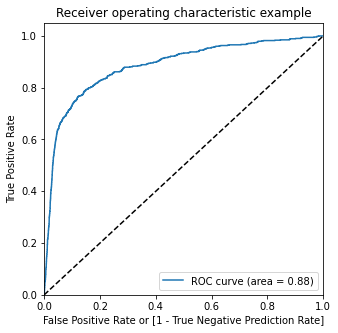

In [174]:
# Plotting the curve for the obtained metrics
plot_roc(y_pred_final.churn,y_pred_final.Conv_prob)

<font style="color:green;font-size:16px">The AUC score for train dataset is <b>0.84</b> and the test dataset is <b>0.88</b>.</font>

### Logistic Regression using PCA

In [175]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 127)
Dimension of X_test: (9001, 127)


In [176]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [177]:
# applying PCA on train data
pca.fit(X_train_smote)

PCA(random_state=42)

In [178]:
X_train_smote_pca=pca.fit_transform(X_train_smote)
print("Dimension of X_train_sm_pca: ",X_train_smote_pca.shape)

Dimension of X_train_sm_pca:  (38576, 127)


In [179]:
X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_test_pca:  (9001, 127)


In [180]:
#Viewing the PCA components
pca.components_

array([[ 1.76483771e-02,  5.45547942e-03,  1.26600446e-02, ...,
        -6.76752819e-02,  1.83442729e-01, -2.33451478e-04],
       [ 5.93978560e-04, -7.51259738e-06,  2.32924400e-03, ...,
         6.62982637e-01, -7.23286128e-01,  2.01037793e-04],
       [ 8.39982539e-03, -2.33723960e-02, -1.52653309e-02, ...,
         6.88611112e-02,  5.21299450e-02,  1.27457989e-03],
       ...,
       [ 1.08515527e-06, -4.95512745e-07, -5.36730717e-06, ...,
        -2.81356771e-08, -3.70519931e-08, -2.54905434e-08],
       [-1.72575828e-07,  3.74127726e-06,  1.27611101e-06, ...,
         5.41374234e-08,  1.60929558e-08,  1.06392430e-08],
       [ 3.98126620e-07, -1.78000551e-06,  2.15062241e-06, ...,
        -1.72032171e-08, -1.46135103e-08, -1.60986100e-08]])

In [181]:
# Instantiate Logistic regression
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_smote_pca, y_train_smote)

LogisticRegression()

In [182]:
# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

In [183]:
# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [184]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",metrics.confusion_matrix(y_test,y_pred),"\n")

Confusion Matirx for y_test & y_pred
 [[7473  799]
 [ 201  528]] 



In [185]:
# Determine the Accuracy of the Predicted model.
print(message_bg.format("The accuracy of the logistic regression model with PCA is: ", \
                        metrics.accuracy_score(y_test,y_pred)))

The accuracy of the logistic regression model with PCA is: 0.8889012331963115


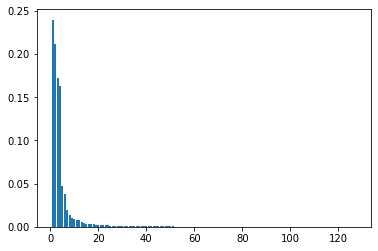

In [186]:
# Plot a bar graph
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

In [187]:
# Let us take the cumulutive sum
var_cumu = np.cumsum(pca.explained_variance_ratio_)

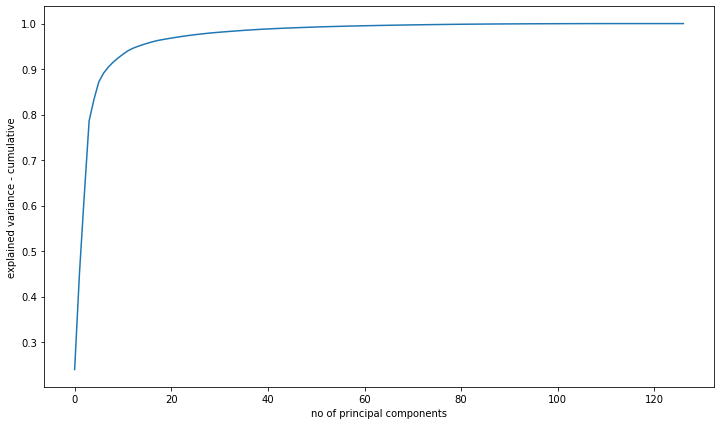

In [188]:
# Create a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [189]:
# Cumulutive sum percentage
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([24. , 45.1, 62.3, 78.6, 83.3, 87.1, 89.1, 90.4, 91.5, 92.4, 93.2,
       93.9, 94.5, 94.9, 95.3, 95.6, 95.9, 96.2, 96.4, 96.6, 96.8, 97. ,
       97.2, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3,
       98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2])

 95% of the data can be explained with 15 PCA components

#### Fitting the dataset with the 8 explainable components

In [190]:
pca_15 = PCA(n_components=15)

In [191]:
train_pca_15 = pca_15.fit_transform(X_train_smote)
print("Dimension for Train dataset using PCA: ", train_pca_15.shape)

Dimension for Train dataset using PCA:  (38576, 15)


In [192]:
test_pca_15 = pca_15.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_15.shape)

Dimension for Test dataset using PCA:  (9001, 15)


In [193]:
logreg_pca_15 = LogisticRegression()
logreg_pca_15.fit(train_pca_15, y_train_smote)

LogisticRegression()

In [194]:
# making the predictions
y_pred_15 = logreg_pca_15.predict(test_pca_15)

In [195]:
# converting the prediction into a dataframe
y_pred_df_15 = pd.DataFrame(y_pred_15)
print("Dimension of y_pred_df_15: ", y_pred_df_15.shape)

Dimension of y_pred_df_15:  (9001, 1)


In [196]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n", metrics.confusion_matrix(y_test,y_pred_15))

Confusion Matirx for y_test & y_pred
 [[8029  243]
 [ 584  145]]


In [197]:
# Determine the Accuracy of the Predicted model.
print(message_bg.format("The accuracy of the logistic regression model with 15 PCA is : ", \
                        metrics.accuracy_score(y_test,y_pred_15)))

The accuracy of the logistic regression model with 15 PCA is : 0.9081213198533497


### Decision Tree

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [199]:
# define a function for plotting train and test accuracy
def plot_accuracy(param, xlabel):
    plt.figure()
    plt.plot(scores[param], 
         scores["mean_train_score"], 
         label="training accuracy")
    plt.plot(scores[param], 
         scores["mean_test_score"], 
         label="test accuracy")
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

##### GridSearchCV to find optimal max_depth

In [200]:
# Definee number of folds for k-fold CV as 5
n_folds = 5

In [201]:
# Define a function for running GridSearchCV with different parameters and folds using decision tree classifier
def run_gridsearch_cv(params, folds):
    dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)
    # Initiate the model
    tree = GridSearchCV(n_jobs=-1, estimator=dtree, param_grid=params, cv=folds, \
                        scoring="accuracy",return_train_score=True)
    # Fit the tree model on training data
    tree.fit(X_train_smote, y_train_smote)
    return tree.cv_results_

In [202]:
# Max_depth parameters to build the model on
parameters = {'max_depth': range(1, 40)}
scores = run_gridsearch_cv(parameters, n_folds)
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.738423,0.038851,0.015758,0.003179,1,{'max_depth': 1},0.790176,0.773428,0.778354,0.771873,0.770706,0.776908,0.007128,39,0.776766,0.780500,0.779722,0.777065,0.778361,0.778483,0.001454
1,1.028648,0.091365,0.022141,0.003478,2,{'max_depth': 2},0.810005,0.814776,0.824368,0.823979,0.830460,0.820718,0.007334,38,0.822975,0.822332,0.819351,0.821782,0.822430,0.821774,0.001269
2,1.253447,0.125433,0.017154,0.003960,3,{'max_depth': 3},0.839684,0.844848,0.853143,0.847699,0.849903,0.847055,0.004578,37,0.849708,0.849065,0.847186,0.845242,0.851560,0.848552,0.002167
3,1.583564,0.214976,0.017952,0.002890,4,{'max_depth': 4},0.856273,0.871160,0.871419,0.869345,0.868438,0.867327,0.005638,36,0.870253,0.870646,0.868702,0.869479,0.870840,0.869984,0.000793
4,1.958961,0.144678,0.014362,0.000798,5,{'max_depth': 5},0.864567,0.875178,0.879196,0.877252,0.877122,0.874663,0.005206,35,0.886811,0.879816,0.879524,0.876608,0.880723,0.880697,0.003354


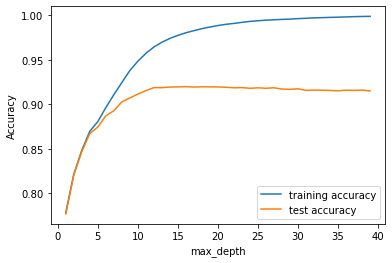

In [203]:
# Plot the accuracy curve
plot_accuracy("param_max_depth", "max_depth")

We observe that as we increase the value of max_depth, both training and test score increase till about max-depth = 4, after which the training score increases more and test score increases less. Note that the scores are average accuracies across the 5-folds.

##### Min sample leaf

In [204]:
# Min_samples_leaf parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}
scores = run_gridsearch_cv(parameters, n_folds)
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.353527,0.512782,0.019148,0.003645,5,{'min_samples_leaf': 5},0.874806,0.918600,0.927673,0.914712,0.920544,0.911267,0.018710,1,0.973720,0.969120,0.971226,0.967597,0.967661,0.969865,0.002335
1,5.104547,0.160190,0.020147,0.002779,25,{'min_samples_leaf': 25},0.872602,0.904472,0.907453,0.908749,0.910823,0.900820,0.014258,2,0.930979,0.925343,0.925407,0.927254,0.923139,0.926424,0.002624
2,4.458791,0.120972,0.022541,0.007453,45,{'min_samples_leaf': 45},0.872084,0.897213,0.901879,0.897991,0.897084,0.893250,0.010727,3,0.917531,0.910599,0.910275,0.910567,0.908623,0.911519,0.003093
3,3.900092,0.167033,0.019349,0.003373,65,{'min_samples_leaf': 65},0.864956,0.891380,0.900065,0.892677,0.897084,0.889232,0.012528,4,0.908069,0.902336,0.902693,0.902660,0.901721,0.903496,0.002313
4,3.632492,0.151735,0.014760,0.000746,85,{'min_samples_leaf': 85},0.866900,0.889307,0.897472,0.891380,0.894232,0.887858,0.010833,5,0.905379,0.898027,0.897703,0.897087,0.896601,0.898959,0.003247


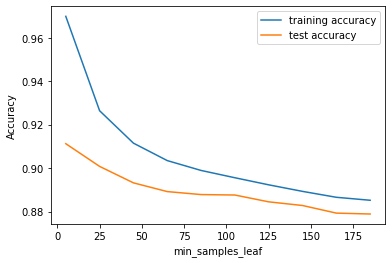

In [205]:
# Plot accuracy for min_samples_leaf
plot_accuracy("param_min_samples_leaf", "min_samples_leaf")

We can see that at values > 125, the test and train score starts to decrease

#### Min samples split

In [206]:
# Min_samples_Split parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}
scores = run_gridsearch_cv(parameters, n_folds)
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.287856,0.594201,0.018750,0.001716,5,{'min_samples_split': 5},0.876879,0.921581,0.927414,0.920674,0.921322,0.913574,0.018507,1,0.996273,0.994815,0.995334,0.995237,0.994718,0.995276,0.000552
1,7.244976,0.689013,0.018351,0.001621,25,{'min_samples_split': 25},0.866770,0.916656,0.924303,0.911342,0.917434,0.907301,0.020680,2,0.972748,0.965231,0.969217,0.968212,0.969832,0.969048,0.002433
2,7.430653,0.554568,0.019149,0.002309,45,{'min_samples_split': 45},0.870270,0.915100,0.916656,0.908620,0.911342,0.904397,0.017295,3,0.956092,0.950552,0.953534,0.955834,0.953566,0.953916,0.002000
3,7.244137,0.650336,0.022141,0.005179,65,{'min_samples_split': 65},0.863660,0.910045,0.911212,0.902916,0.912249,0.900016,0.018470,4,0.945690,0.941382,0.944849,0.945854,0.942938,0.944143,0.001726
4,7.229997,0.936582,0.022340,0.006840,85,{'min_samples_split': 85},0.862882,0.905768,0.907194,0.901102,0.908101,0.897009,0.017233,5,0.938302,0.934416,0.936651,0.937008,0.936392,0.936554,0.001255


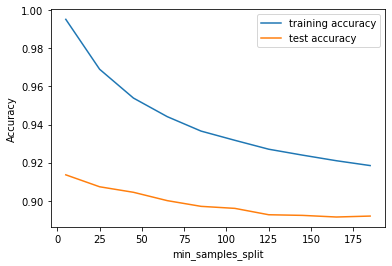

In [207]:
# Plot accuracy for min_sample_split
plot_accuracy("param_min_samples_split", "min_samples_split")

We observe that at a value greater than equal to 150 the train and test score have constant difference

#### Now we will be running the model with grid search to find the optimal hyper parameters

In [208]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

In [209]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)
grid_search = GridSearchCV(n_jobs=-1, estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [210]:
# Get the cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.655603,0.042428,0.027728,0.014662,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.861586,0.876734,0.883085,0.875437,0.877771,0.874923,0.007157,9
1,2.649021,0.043320,0.029521,0.011027,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.861586,0.876734,0.883085,0.875437,0.877771,0.874923,0.007157,9
2,2.769603,0.151032,0.027527,0.011811,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.861586,0.875178,0.883863,0.874919,0.877511,0.874611,0.007267,11
3,2.872335,0.185420,0.017752,0.004566,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.861586,0.875178,0.883863,0.874919,0.877511,0.874611,0.007267,11
4,4.468662,0.058763,0.017154,0.002849,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.878434,0.897084,0.895917,0.901231,0.904213,0.895376,0.008973,1
5,4.363331,0.063539,0.022740,0.006806,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.878434,0.897084,0.895917,0.901231,0.904213,0.895376,0.008973,1
6,4.009078,0.048411,0.017554,0.004019,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.870918,0.891640,0.894491,0.889566,0.892417,0.887806,0.008590,7
7,4.236669,0.068991,0.017553,0.005732,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.870918,0.891640,0.894491,0.889566,0.892417,0.887806,0.008590,7
8,1.738949,0.023808,0.018351,0.004069,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.864178,0.874530,0.878937,0.877252,0.876604,0.874300,0.005254,15
9,1.846063,0.045734,0.015957,0.002676,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.864178,0.874530,0.878937,0.877252,0.876604,0.874300,0.005254,15


In [211]:
# Get the optimal accuracy score and hyperparameters
print(message_bg.format("The best accuracy is: ", grid_search.best_score_))
print(message_br.format("The best estimators are: ", grid_search.best_estimator_))

The best accuracy is: 0.8953758020888664
The best estimators are: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=100)


#### Running the model with the best parameters obtained from the grid search

In [212]:
# Build model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_gini.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [213]:
# Predict based on this model
y_pred = clf_gini.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8272
           1       0.41      0.46      0.43       729

    accuracy                           0.90      9001
   macro avg       0.68      0.70      0.69      9001
weighted avg       0.91      0.90      0.90      9001



### ADA Boosting

In [214]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder

In [215]:
# Base estimator: a weak learner with max_depth=2
dt = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [216]:
# fit the shallow decision tree 
dt.fit(X_train_smote, y_train_smote)
y_train_pred = dt.predict(X_train_smote)
print(message_bg.format("The train Accuracy is: ", metrics.accuracy_score(y_train_smote, y_train_pred)))

The train Accuracy is: 0.8203805474906678


In [217]:
# Adaboost classifier with the tree as base estimator

estimators = list(range(1, 50, 3))

abc_scores = []
for n_est in estimators:
    ABClassifier = AdaBoostClassifier(
    base_estimator=dt, 
    n_estimators = n_est)
    
    ABClassifier.fit(X_train_smote, y_train_smote)
    y_pred = ABClassifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

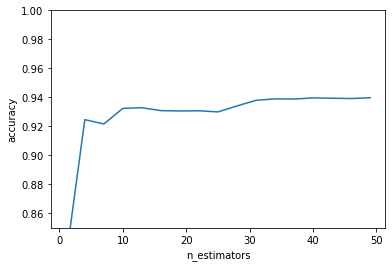

In [218]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.85, 1])
plt.show()

From the above graph it seems that 11 trees will give the maximum accuracy

In [219]:
ABClassifier = AdaBoostClassifier(
    base_estimator=dt, 
    n_estimators = 11)
    
ABClassifier.fit(X_train_smote, y_train_smote)
y_pred = ABClassifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(message_bg.format("The test Accuracy is: ", score))

The test Accuracy is: 0.9334518386845906


In [220]:
# Printing confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[8137  135]
 [ 464  265]]


### Random Forest

In [221]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [222]:
# Running the random forest with 11 trees
rfc = RandomForestClassifier(n_estimators=11)
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(n_estimators=11)

In [223]:
# Making predictions
predictions = rfc.predict(X_test)

In [224]:
# Print classification report 
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      8272
           1       0.12      0.18      0.15       729

    accuracy                           0.83      9001
   macro avg       0.52      0.53      0.53      9001
weighted avg       0.86      0.83      0.84      9001



#### Grid search to find optimal parameters for Random Forests

In [225]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50),
    'n_estimators': [5,10,15,20], 
    'max_features': [5, 10, 15]
}

In [226]:
# Create a based model
rf = RandomForestClassifier()

In [227]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [228]:
# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': range(10, 20, 30),
                         'min_samples_split': range(10, 30, 50),
                         'n_estimators': [5, 10, 15, 20]},
             verbose=1)

In [229]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9323674072850475 using {'max_depth': 20, 'max_features': 15, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}


#### Fitting the best model

In [230]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=16,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=15,
                             n_estimators=20)

In [231]:
# Train the model
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=16, max_features=15, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=20)

In [232]:
# Make prediction
predictions = rfc.predict(X_test)

In [233]:
# print the classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8272
           1       0.71      0.47      0.57       729

    accuracy                           0.94      9001
   macro avg       0.83      0.73      0.77      9001
weighted avg       0.93      0.94      0.94      9001



## Conclusion

We executed different models. The models and their accuracy score (approx) are given below:

- Logistic Regression with PCA (with 15 PCA after dimension reduction)  <font color="green"><b>&nbsp;&nbsp;&nbsp; - Accuracy 91%</b></font>
- Logistic Regression with RFE <font color="green"><b>&nbsp;&nbsp;&nbsp; - Accuracy 84%</b></font>
- Decision Tree (with best estimators) <font color="green"><b>&nbsp;&nbsp;&nbsp; - Accuracy 90%</b></font>
- Random Forest <font color="green"><b>&nbsp;&nbsp;&nbsp; - Accuracy 94%</b></font>
- ADA Boosting with Decision Tree classifier <font color="green"><b>&nbsp;&nbsp;&nbsp; - Accuracy 93%</b></font>

#### We observe that the accuracy for ADA boost and Random Forest were comparitively better which were 93 and 94 approx. Hence let us select the best features from random forest model best features.

In [234]:
# Get features in order of their importance
feature_by_importance = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [235]:
# Diplay the features with thier importance
feature_by_importance

,importance
roam_ic_mou_8,0.101760
loc_ic_t2m_mou_8,0.077726
loc_ic_t2t_mou_8,0.065018
loc_ic_mou_8,0.062211
roam_og_mou_8,0.048185
total_og_mou_8,0.045493
loc_og_mou_8,0.038485
offnet_mou_8,0.037047
av_rech_amt_data_8,0.033740
total_rech_num_8,0.031570


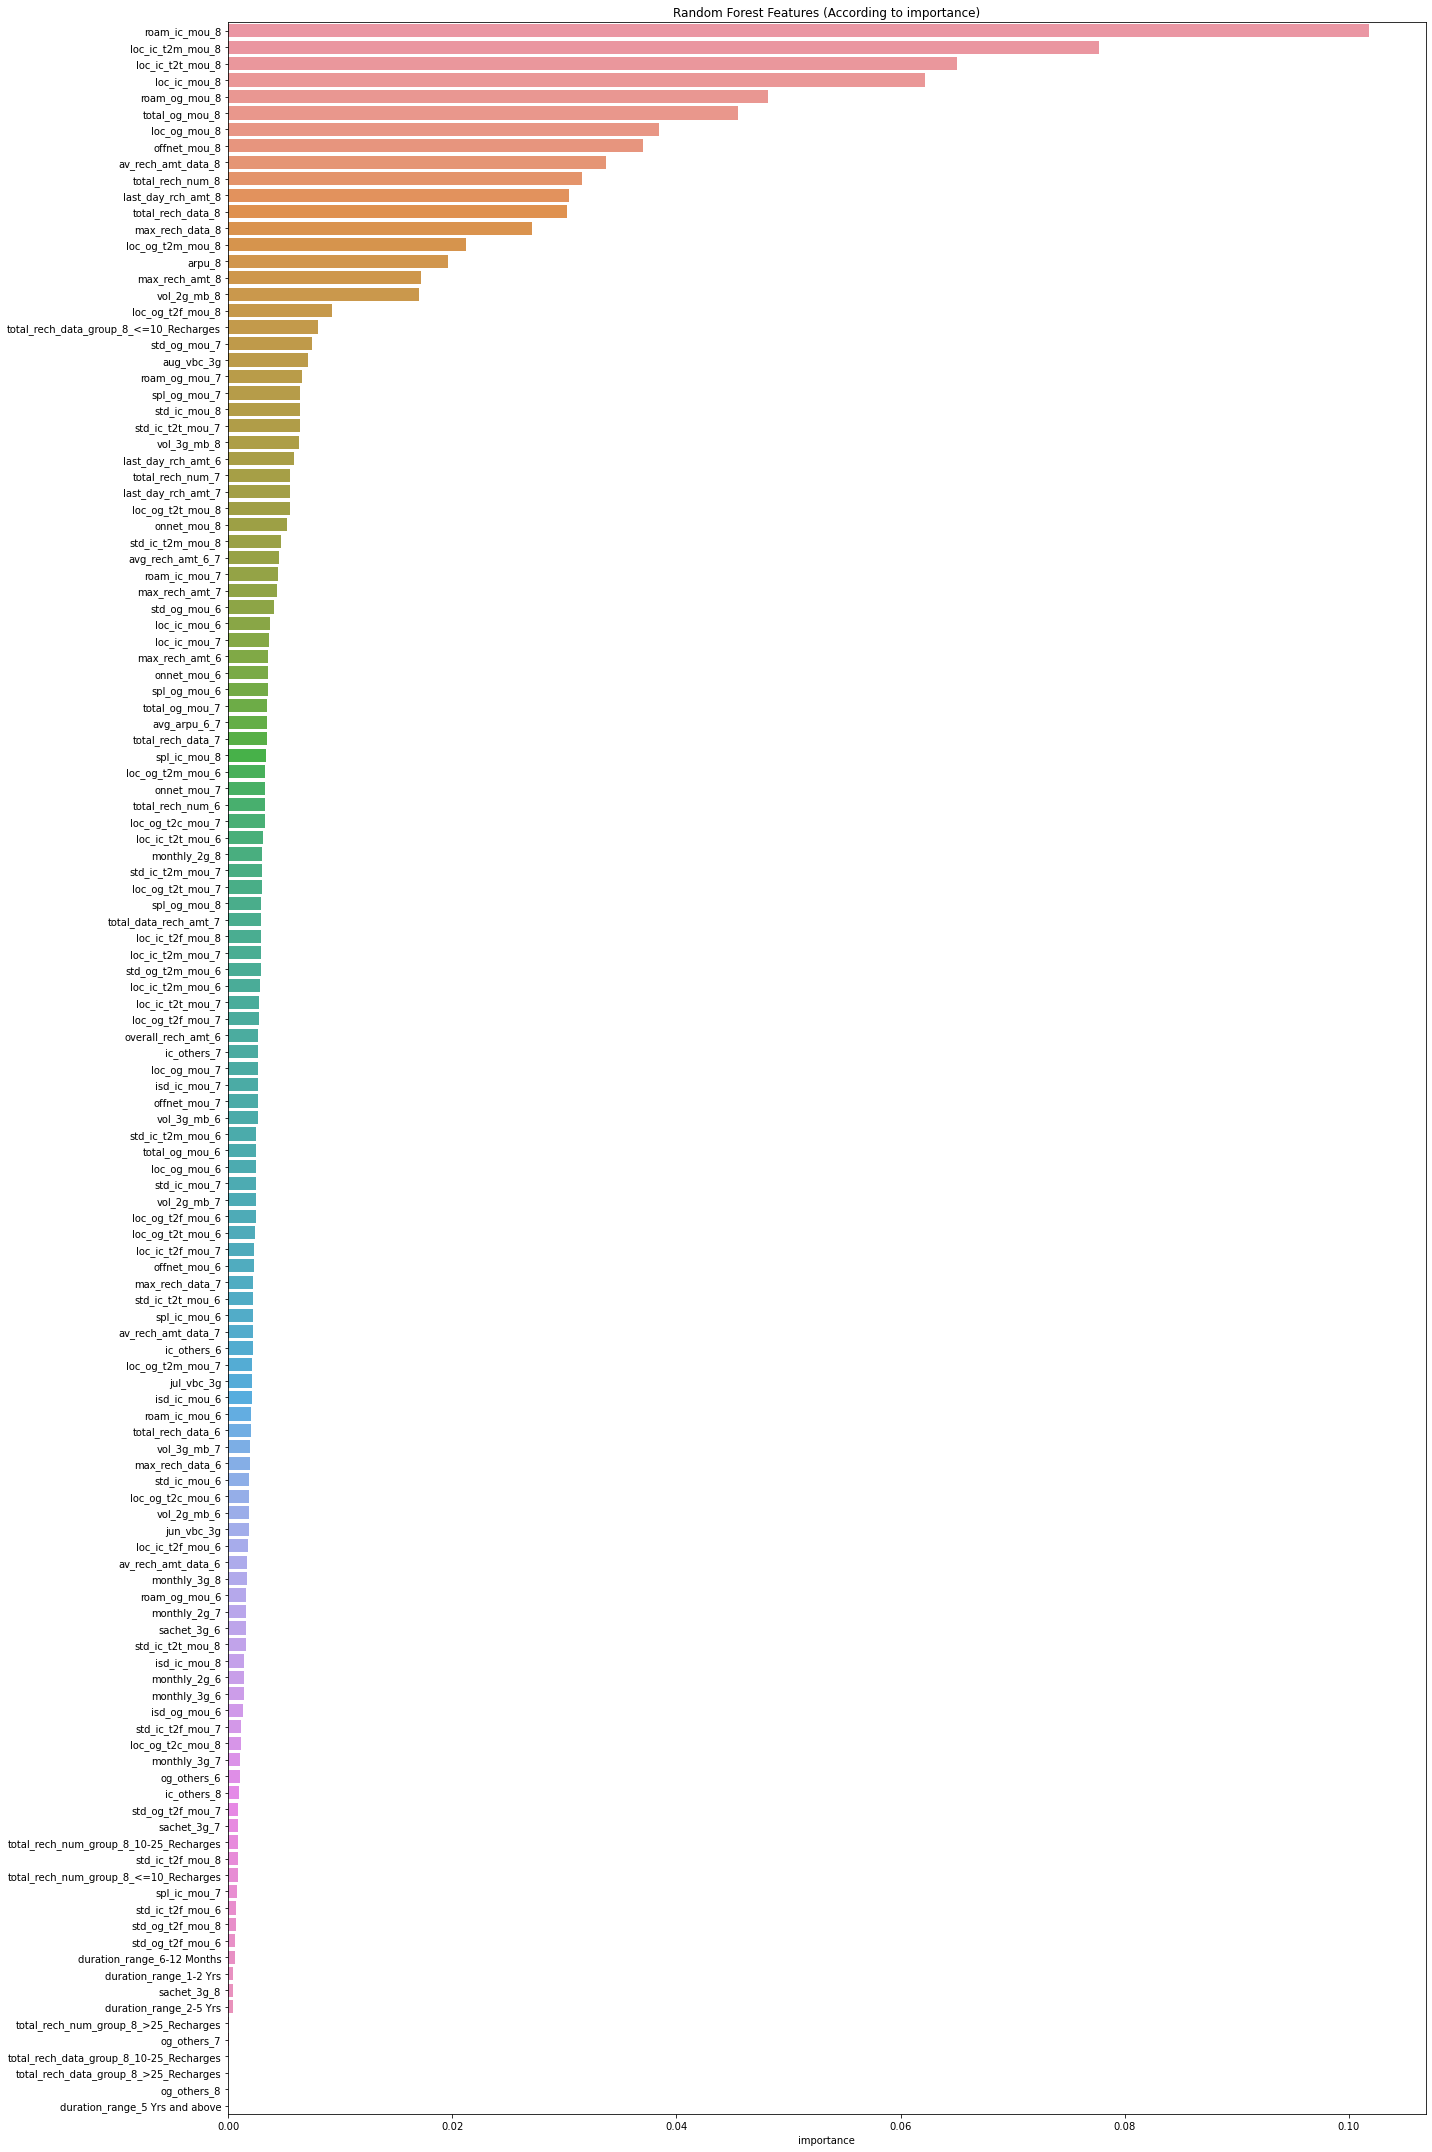

In [236]:
# Plot the features by importance
plt.figure(figsize=(20, 30))
sns.barplot(x = "importance",
            y = feature_by_importance.index,
            data = feature_by_importance)

plt.title('Random Forest Features (According to importance)')
plt.tight_layout()
plt.show()

In [237]:
# Filter out the top 20 features
top_20_features = feature_by_importance.iloc[:20,:]

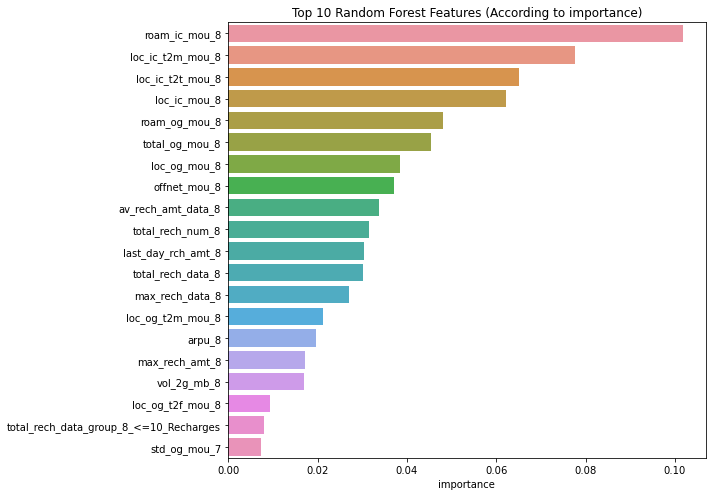

In [238]:
# Plot the top 10  features by importance
plt.figure(figsize=(10, 7))
sns.barplot(x = "importance",
            y = top_20_features.index,
            data = top_20_features)

plt.title('Top 10 Random Forest Features (According to importance)')
plt.tight_layout()
plt.show()

#### We have identified the top indicator variables for the churn, out of which following are the top 20 variables

- roam_ic_mou_8
- roam_og_mou_8
- loc_ic_mou_8
- arpu_8
- loc_og_mou_8
- loc_ic_t2t_mou_8
- last_day_rch_amt_8
- loc_og_t2m_mou_8
- total_rech_num_8
- loc_ic_t2m_mou_8
- av_rech_amt_data_8
- total_og_mou_8
- std_ic_mou_8
- loc_og_t2t_mou_8
- total_rech_data_8
- last_day_rch_amt_7
- max_rech_amt_8
- max_rech_data_8
- total_rech_data_group_8_<=10_Recharges
- last_day_rch_amt_6

#### Hence the business needs to take special attention and consideration based on the above indicators specially for attributes related to the month of August i.e. the 'Action' phase to prevent a customer from churn. Some of those attributes are:
- Roaming incoming  and outgoing minute of usage for the month of August
- Local incoming and outgoing minute of usage for the month of August
- Last day recharge amount and total recharge count
- Average recharge amounts
- etc.


=============================== End of Assignment ===========================================================